In [1]:
import pandas as pd

# Ouvrir le fichier CSV
df = pd.read_csv('ReArm_C1P44_V1_101_53727.csv')
df1= pd.read_csv('ReArm_C1P44_V1_201_52105.csv')
# Afficher les premières lignes du fichier
print(df.head())
print(df1.head())

   1721419205.0600  -36  284  -232
0     1.721419e+09 -224  -92   -60
1     1.721419e+09 -236  -96   -64
2     1.721419e+09 -240  -96   -72
3     1.721419e+09 -252 -108   -80
4     1.721419e+09 -248 -108   -80
   1721419207.4200  112  232  -96
0     1.721419e+09 -240   20   56
1     1.721419e+09 -248   20   60
2     1.721419e+09 -248   20   56
3     1.721419e+09 -252   20   60
4     1.721419e+09 -252   16   52


In [4]:
noms_colonnes = df.columns
print(f"Les noms des colonnes dans le tableau sont : {noms_colonnes}") 
df.columns = ['date_heure', 'X', 'Y', 'Z']
print(f"Nouveaux noms des colonnes : {df.columns}")


noms_colonnes = df1.columns
print(f"Les noms des colonnes dans le tableau sont : {noms_colonnes}") 
df1.columns = ['date_heure', 'X', 'Y', 'Z']
print(f"Nouveaux noms des colonnes : {df1.columns}")

Les noms des colonnes dans le tableau sont : Index(['date_heure', 'X', 'Y', 'Z'], dtype='object')
Nouveaux noms des colonnes : Index(['date_heure', 'X', 'Y', 'Z'], dtype='object')
Les noms des colonnes dans le tableau sont : Index(['date_heure', 'X', 'Y', 'Z'], dtype='object')
Nouveaux noms des colonnes : Index(['date_heure', 'X', 'Y', 'Z'], dtype='object')


In [6]:
print(df1.head())

     date_heure    X   Y   Z
0  1.721419e+09 -240  20  56
1  1.721419e+09 -248  20  60
2  1.721419e+09 -248  20  56
3  1.721419e+09 -252  20  60
4  1.721419e+09 -252  16  52


In [8]:
df['date_heure'] = pd.to_datetime(df['date_heure'], unit='s')
print(df.head())


df1['date_heure'] = pd.to_datetime(df1['date_heure'], unit='s')
print(df1.head())

                     date_heure    X    Y   Z
0 2024-07-19 20:00:05.079999924 -224  -92 -60
1 2024-07-19 20:00:05.099999905 -236  -96 -64
2 2024-07-19 20:00:05.119999886 -240  -96 -72
3 2024-07-19 20:00:05.140000105 -252 -108 -80
4 2024-07-19 20:00:05.160000086 -248 -108 -80
                     date_heure    X   Y   Z
0 2024-07-19 20:00:07.440000057 -240  20  56
1 2024-07-19 20:00:07.460000038 -248  20  60
2 2024-07-19 20:00:07.480000019 -248  20  56
3 2024-07-19 20:00:07.500000000 -252  20  60
4 2024-07-19 20:00:07.519999981 -252  16  52


In [10]:
# Calculer la différence de temps entre les échantillons
time_diffs = df['date_heure'].diff().dropna()

# Calculer la fréquence d'échantillonnage (nombre d'échantillons par seconde)
sampling_frequency = 1 / time_diffs.dt.total_seconds().mean()

print(f"La fréquence d'échantillonnage du bras sain est : {sampling_frequency} Hz")

# Calculer la différence de temps entre les échantillons
time_diffs1 = df1['date_heure'].diff().dropna()

# Calculer la fréquence d'échantillonnage (nombre d'échantillons par seconde)
sampling_frequency1 = 1 / time_diffs1.dt.total_seconds().mean()

print(f"La fréquence d'échantillonnage du bras parétique est : {sampling_frequency1} Hz")

La fréquence d'échantillonnage du bras sain est : 50.60137194831636 Hz
La fréquence d'échantillonnage du bras parétique est : 49.053749648912834 Hz


In [11]:
# Définir la nouvelle fréquence d'échantillonnage pour df1
new_sampling_frequency1 = 50  # en Hz

# Créer une nouvelle série temporelle avec la nouvelle fréquence d'échantillonnage pour df1
new_time_index1 = pd.date_range(start=df1['date_heure'].min(), end=df1['date_heure'].max(), freq=f'{1/new_sampling_frequency1}S')

# Réindexer le DataFrame pour inclure la nouvelle série temporelle pour df1
df1_reindexed = df1.set_index('date_heure').reindex(new_time_index1)

# Interpoler les valeurs manquantes avec une interpolation linéaire pour df1
df1_interpolated = df1_reindexed.interpolate(method='linear')

# Réinitialiser l'index pour avoir 'date_heure' comme colonne pour df1
df1_interpolated.reset_index(inplace=True)
df1_interpolated.rename(columns={'index': 'date_heure'}, inplace=True)

print(df1_interpolated.head())
new_sampling_frequency = 50  # en Hz

# Créer une nouvelle série temporelle avec la nouvelle fréquence d'échantillonnage
new_time_index = pd.date_range(start=df['date_heure'].min(), end=df['date_heure'].max(), freq=f'{1/new_sampling_frequency}S')

# Réindexer le DataFrame pour inclure la nouvelle série temporelle
df_reindexed = df.set_index('date_heure').reindex(new_time_index)

# Interpoler les valeurs manquantes avec une interpolation linéaire
df_interpolated = df_reindexed.interpolate(method='linear')

# Réinitialiser l'index pour avoir 'date_heure' comme colonne
df_interpolated.reset_index(inplace=True)
df_interpolated.rename(columns={'index': 'date_heure'}, inplace=True)

print(df_interpolated.head())

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/301703647.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  new_time_index1 = pd.date_range(start=df1['date_heure'].min(), end=df1['date_heure'].max(), freq=f'{1/new_sampling_frequency1}S')


                     date_heure      X      Y     Z
0 2024-07-19 20:00:07.440000057 -240.0  20.00  56.0
1 2024-07-19 20:00:07.460000057 -240.0  20.32  56.0
2 2024-07-19 20:00:07.480000057 -240.0  20.64  56.0
3 2024-07-19 20:00:07.500000057 -240.0  20.96  56.0
4 2024-07-19 20:00:07.520000057 -240.0  21.28  56.0


/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/301703647.py:21: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  new_time_index = pd.date_range(start=df['date_heure'].min(), end=df['date_heure'].max(), freq=f'{1/new_sampling_frequency}S')


                     date_heure      X      Y      Z
0 2024-07-19 20:00:05.079999924 -224.0 -92.00 -60.00
1 2024-07-19 20:00:05.099999924 -224.8 -92.32 -60.16
2 2024-07-19 20:00:05.119999924 -225.6 -92.64 -60.32
3 2024-07-19 20:00:05.139999924 -226.4 -92.96 -60.48
4 2024-07-19 20:00:05.159999924 -227.2 -93.28 -60.64


In [12]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt 
# Appliquer le filtre Savitzky-Golay sur les colonnes X, Y et Z pour df1_interpolated
df1_interpolated['X_smooth'] = savgol_filter(df1_interpolated['X'], window_length=51, polyorder=3)
df1_interpolated['Y_smooth'] = savgol_filter(df1_interpolated['Y'], window_length=51, polyorder=3)
df1_interpolated['Z_smooth'] = savgol_filter(df1_interpolated['Z'], window_length=51, polyorder=3)

# Vérifier si 'date_heure' est dans les colonnes de df1_interpolated
if 'date_heure' not in df1_interpolated.columns:
    df1_interpolated.reset_index(inplace=True)
    df1_interpolated.rename(columns={'index': 'date_heure'}, inplace=True)

# Grouper les données par jour pour df1_interpolated
df1_interpolated['date'] = df1_interpolated['date_heure'].dt.date
grouped1 = df1_interpolated.groupby('date')

# Appliquer le filtre Savitzky-Golay sur les colonnes X, Y et Z
df_interpolated['X_smooth'] = savgol_filter(df_interpolated['X'], window_length=51, polyorder=3)
df_interpolated['Y_smooth'] = savgol_filter(df_interpolated['Y'], window_length=51, polyorder=3)
df_interpolated['Z_smooth'] = savgol_filter(df_interpolated['Z'], window_length=51, polyorder=3)

# Vérifier si 'date_heure' est dans les colonnes de df_interpolated
if 'date_heure' not in df_interpolated.columns:
    df_interpolated.reset_index(inplace=True)
    df_interpolated.rename(columns={'index': 'date_heure'}, inplace=True)

# Grouper les données par jour
df_interpolated['date'] = df_interpolated['date_heure'].dt.date
grouped = df_interpolated.groupby('date')

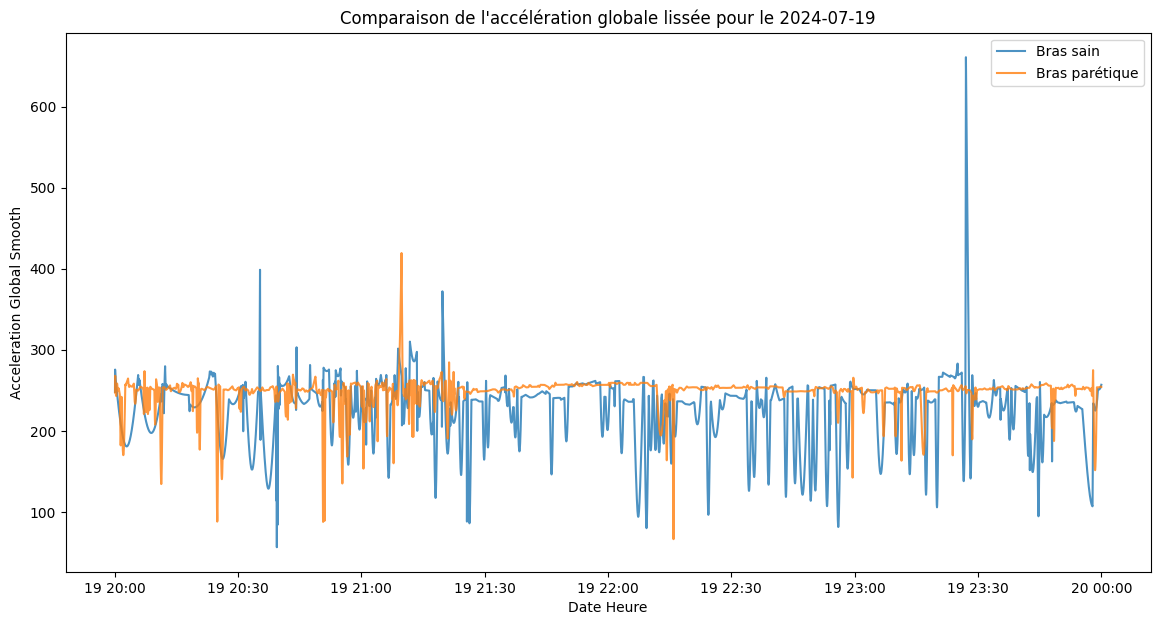

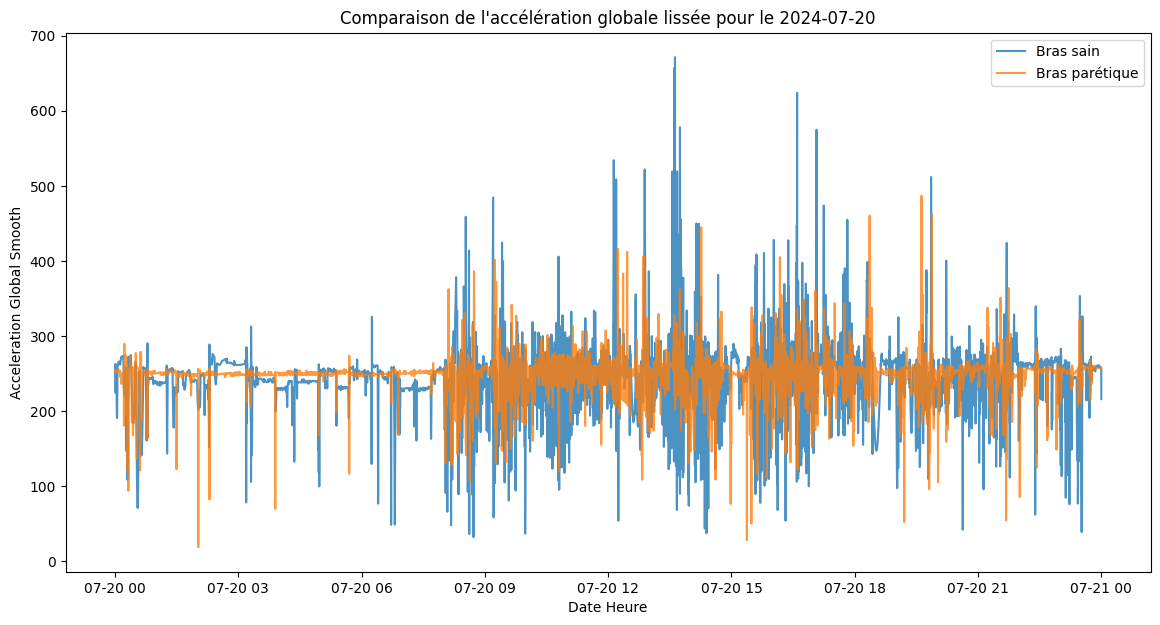

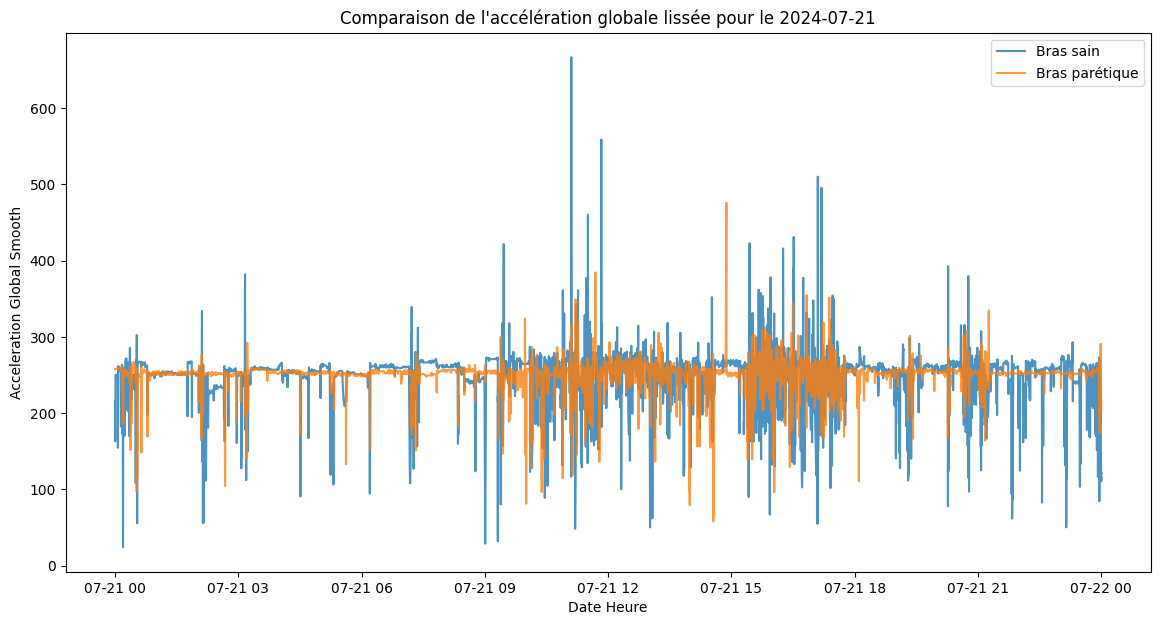

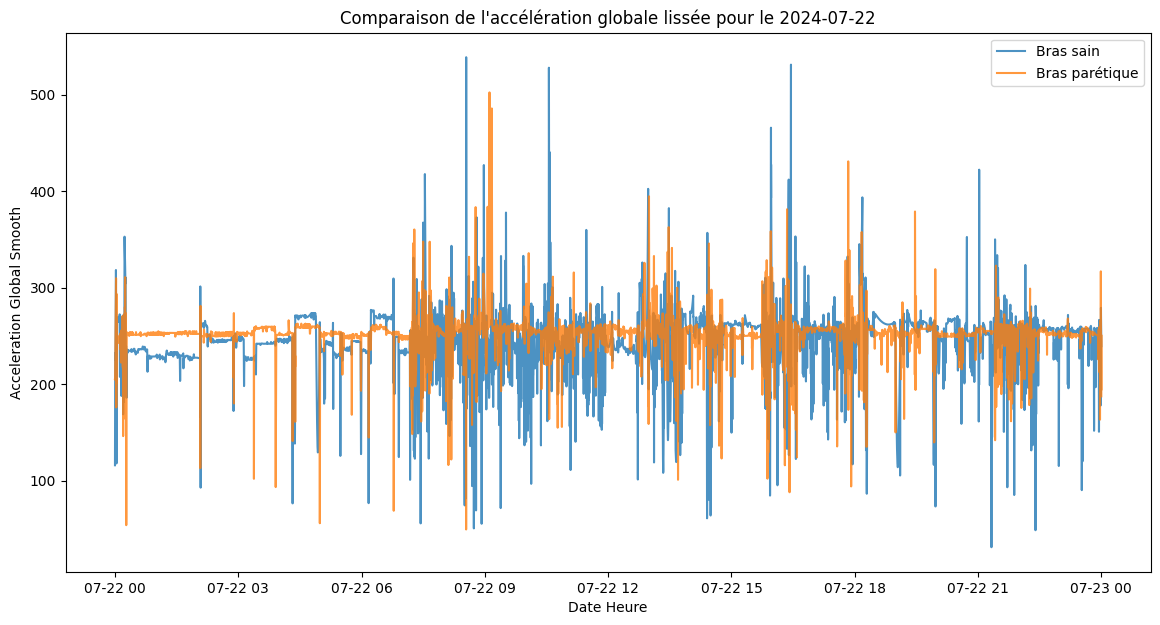

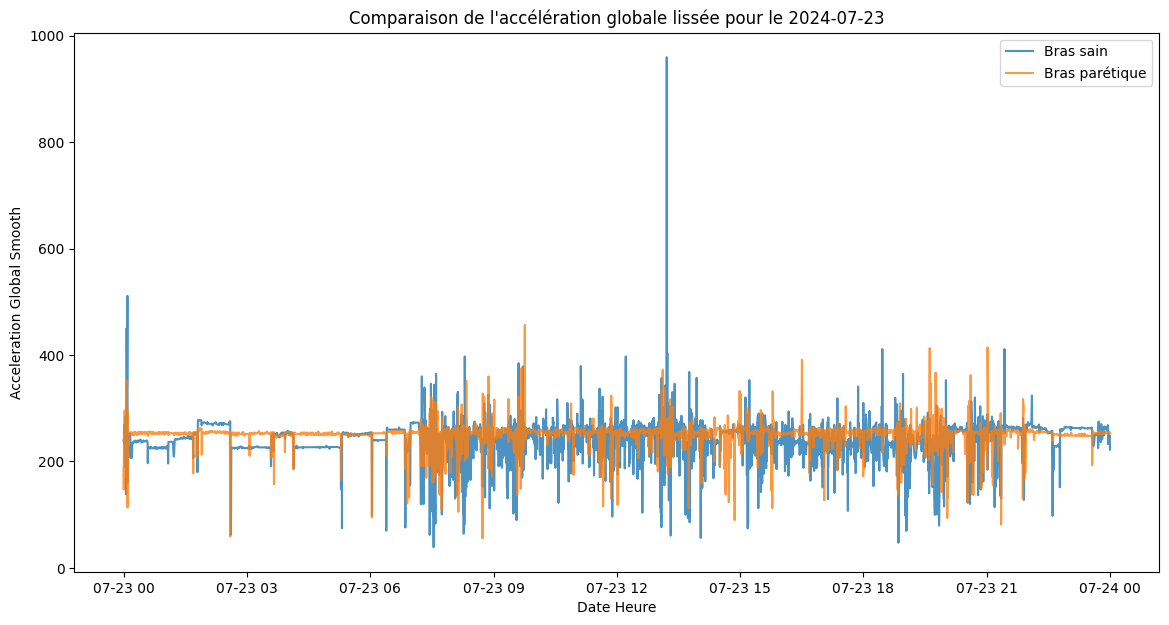

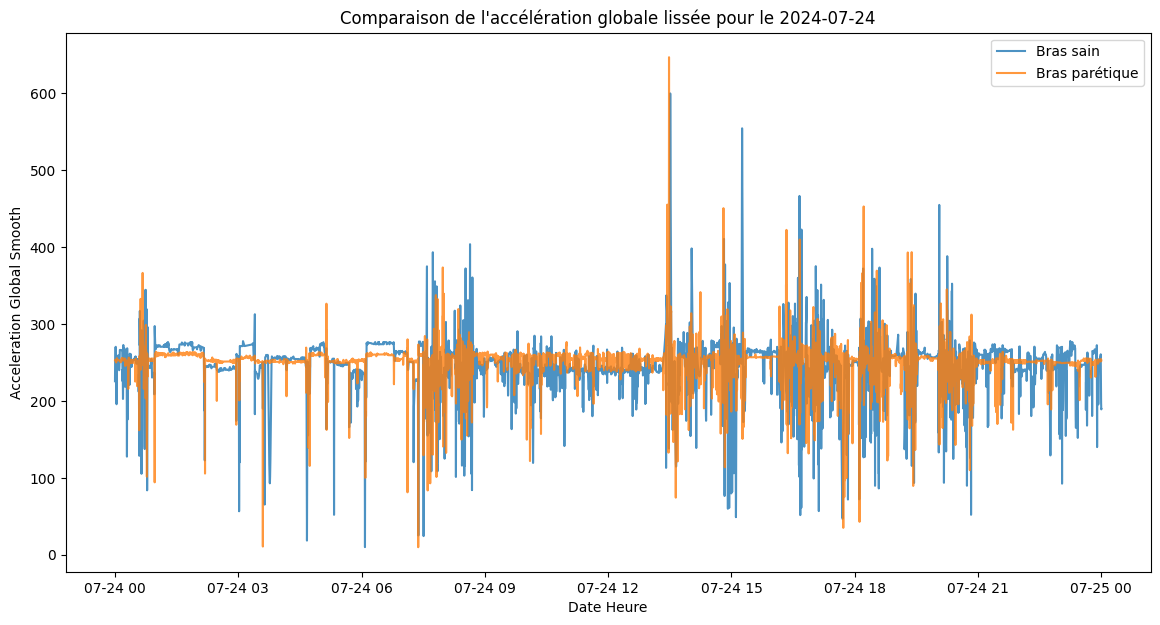

In [11]:
# Calculer l'accélération globale pour df1_interpolated 
df1_interpolated['acceleration_global'] = (df1_interpolated[['X', 'Y', 'Z']]**2).sum(axis=1)**0.5

# Appliquer le filtre Savitzky-Golay sur l'accélération globale pour df1_interpolated
df1_interpolated['acceleration_global_smooth'] = savgol_filter(df1_interpolated['acceleration_global'], window_length=51, polyorder=3)

# Calculer l'accélération globale pour df_interpolated 
df_interpolated['acceleration_global'] = (df_interpolated[['X', 'Y', 'Z']]**2).sum(axis=1)**0.5

# Appliquer le filtre Savitzky-Golay sur l'accélération globale pour df_interpolated
df_interpolated['acceleration_global_smooth'] = savgol_filter(df_interpolated['acceleration_global'], window_length=51, polyorder=3)

# Grouper les données par jour pour df1_interpolated
grouped1 = df1_interpolated.groupby('date')

# Comparer les données jour par jour entre df_interpolated et df1_interpolated
for date, group in grouped:
    group1 = grouped1.get_group(date)
    plt.figure(figsize=(14, 7))
    plt.plot(group['date_heure'], group['acceleration_global_smooth'], label='Bras sain', alpha=0.8)
    plt.plot(group1['date_heure'], group1['acceleration_global_smooth'], label='Bras parétique', alpha=0.8)
    plt.xlabel('Date Heure')
    plt.ylabel('Acceleration Global Smooth')
    plt.title(f'Comparaison de l\'accélération globale lissée pour le {date}')
    plt.legend()
    plt.show()

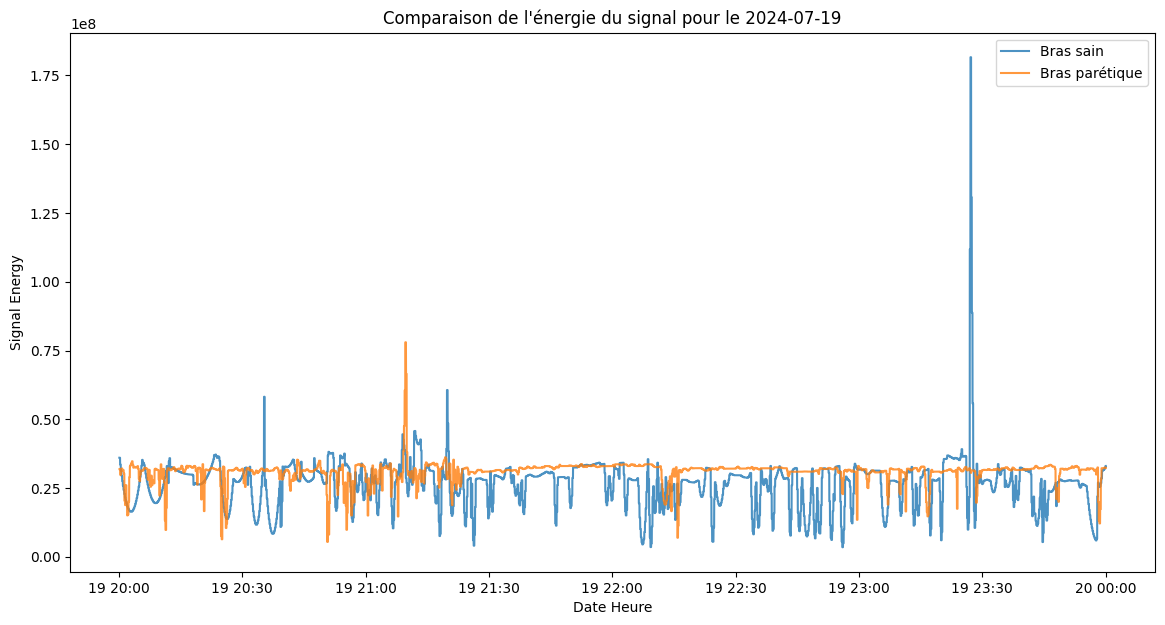

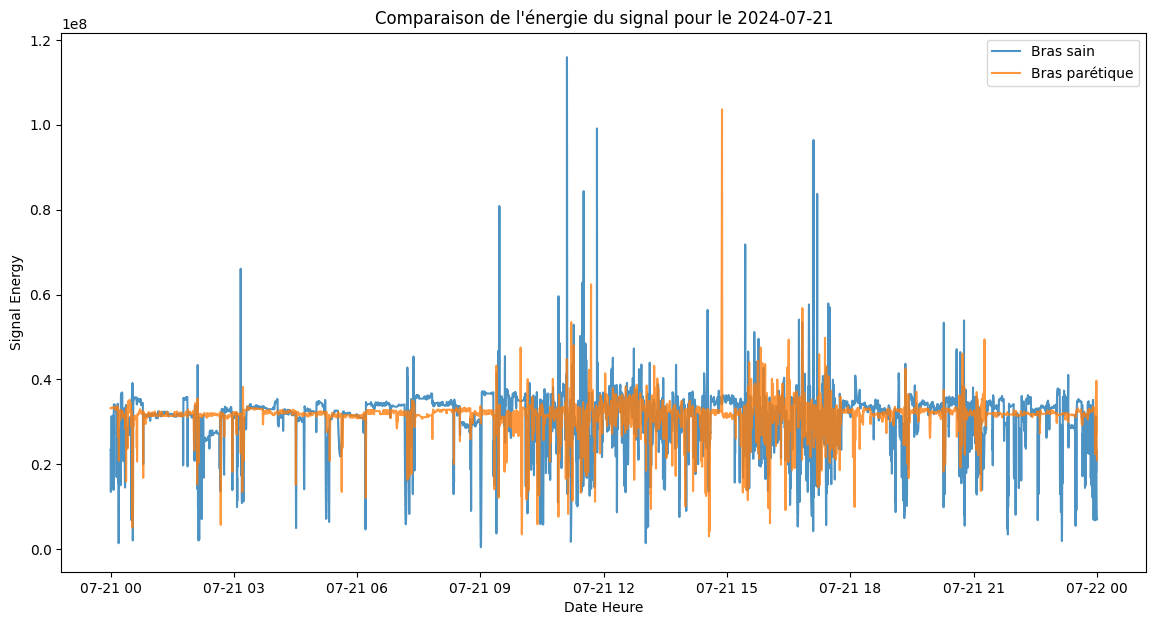

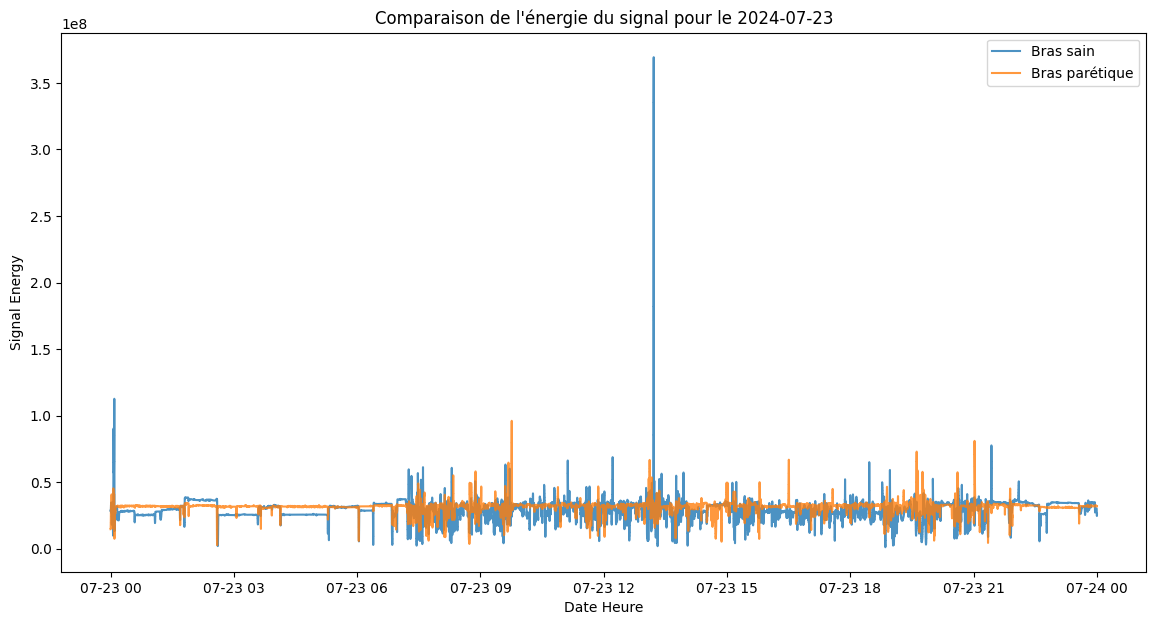

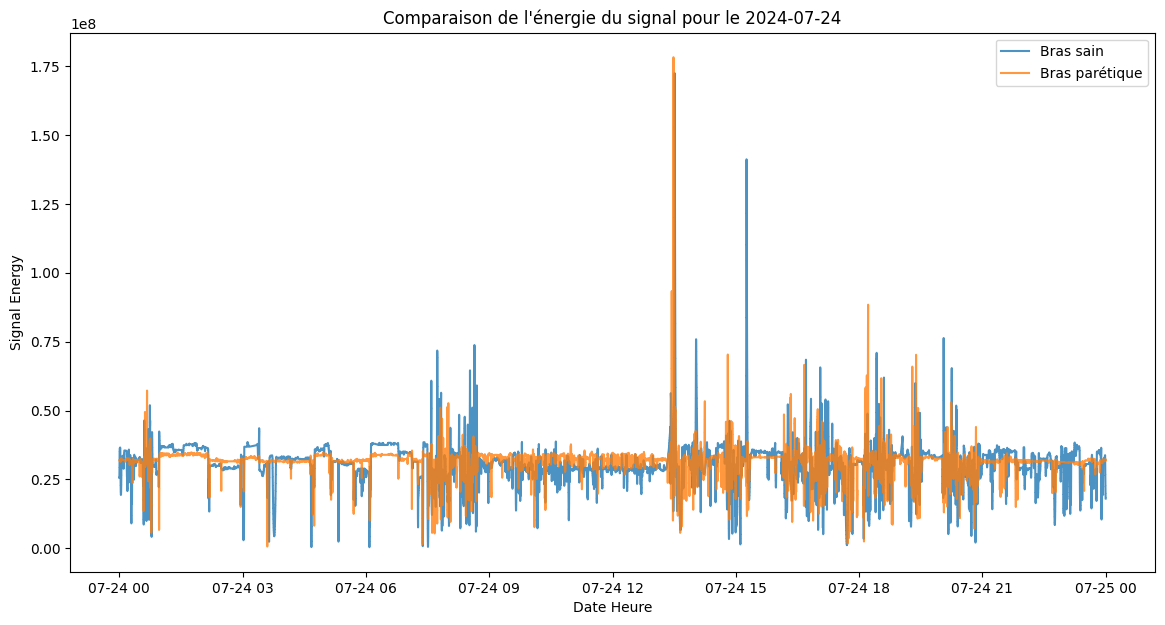

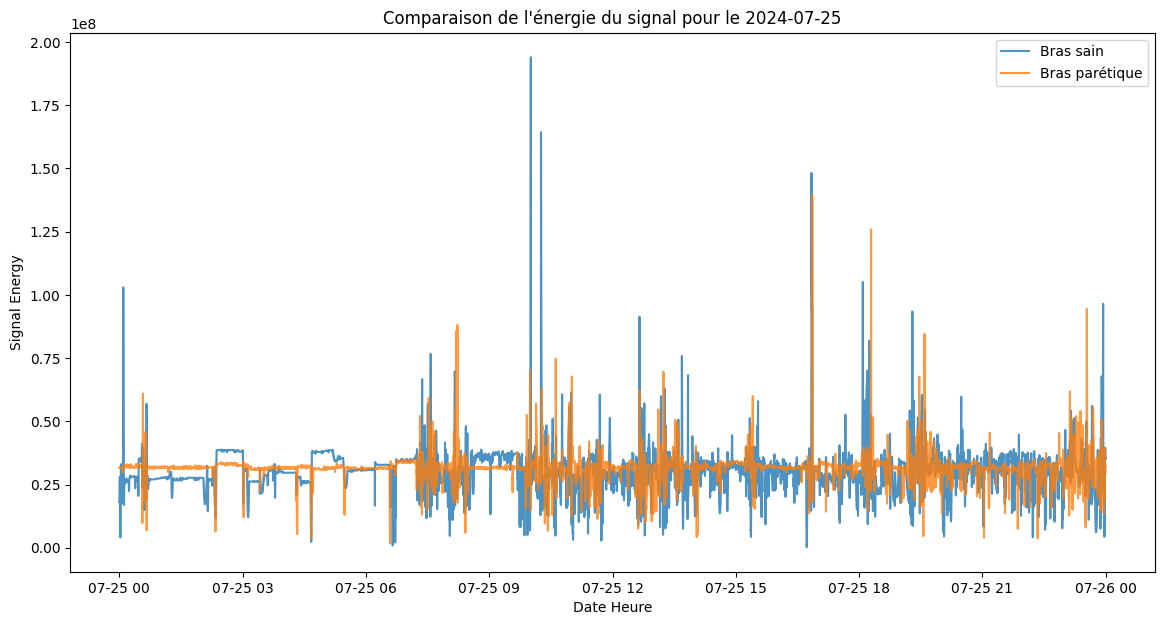

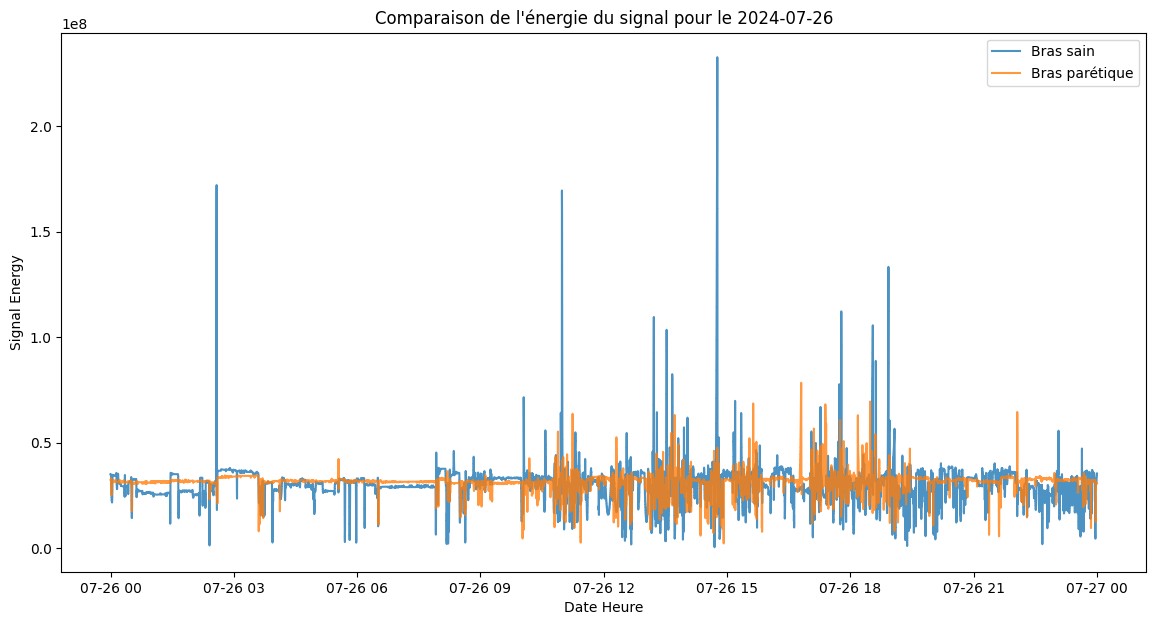

In [16]:
import numpy as np
# Définir la taille de la fenêtre (en nombre d'échantillons)
window_size = 500 

# Calculer l'énergie du signal pour chaque fenêtre
def calculate_signal_energy(df, window_size):
    energy = []
    for i in range(0, len(df) - window_size + 1, window_size):
        window = df['acceleration_global_smooth'].iloc[i:i + window_size]
        energy.append((window ** 2).sum())
    return energy

# Appliquer la fonction pour calculer l'énergie du signal pour df1_interpolated
signal_energy1 = calculate_signal_energy(df1_interpolated, window_size)
signal_energy = calculate_signal_energy(df_interpolated, window_size)

# Ajouter l'énergie du signal au DataFrame df1_interpolated
df1_interpolated['signal_energy'] = np.nan
for i, e in enumerate(signal_energy1):
    df1_interpolated.loc[i * window_size:(i + 1) * window_size - 1, 'signal_energy'] = e

# Ajouter l'énergie du signal au DataFrame df_interpolated
df_interpolated['signal_energy'] = np.nan
for i, e in enumerate(signal_energy):
    df_interpolated.loc[i * window_size:(i + 1) * window_size - 1, 'signal_energy'] = e

# Grouper les données par jour pour df1_interpolated
df1_interpolated['date'] = df1_interpolated['date_heure'].dt.date
grouped1 = df1_interpolated.groupby('date')

# Grouper les données par jour pour df_interpolated
df_interpolated['date'] = df_interpolated['date_heure'].dt.date
grouped = df_interpolated.groupby('date')

# Comparer l'énergie du signal jour par jour entre df_interpolated et df1_interpolated
for date, group in grouped:
    group1 = grouped1.get_group(date)
    plt.figure(figsize=(14, 7))
    plt.plot(group['date_heure'], group['signal_energy'], label='Bras sain', alpha=0.8)
    plt.plot(group1['date_heure'], group1['signal_energy'], label='Bras parétique', alpha=0.8)
    plt.xlabel('Date Heure')
    plt.ylabel('Signal Energy')
    plt.title(f'Comparaison de l\'énergie du signal pour le {date}')
    plt.legend()
    plt.show()

In [22]:
# Définir la nouvelle fréquence d'échantillonnage
new_sampling_frequency_10Hz = 10  # en Hz

# Créer une nouvelle série temporelle avec la nouvelle fréquence d'échantillonnage pour df1
new_time_index_10Hz_df1 = pd.date_range(start=df1['date_heure'].min(), end=df1['date_heure'].max(), freq=f'{1/new_sampling_frequency_10Hz}S')

# Réindexer le DataFrame pour inclure la nouvelle série temporelle pour df1
df1_reindexed_10Hz = df1.set_index('date_heure').reindex(new_time_index_10Hz_df1)

# Interpoler les valeurs manquantes avec une interpolation linéaire pour df1
df1_interpolated_10Hz = df1_reindexed_10Hz.interpolate(method='linear')

# Réinitialiser l'index pour avoir 'date_heure' comme colonne pour df1
df1_interpolated_10Hz.reset_index(inplace=True)
df1_interpolated_10Hz.rename(columns={'index': 'date_heure'}, inplace=True)

print(df1_interpolated_10Hz.head())

# Créer une nouvelle série temporelle avec la nouvelle fréquence d'échantillonnage pour df
new_time_index_10Hz_df = pd.date_range(start=df['date_heure'].min(), end=df['date_heure'].max(), freq=f'{1/new_sampling_frequency_10Hz}S')

# Réindexer le DataFrame pour inclure la nouvelle série temporelle pour df
df_reindexed_10Hz = df.set_index('date_heure').reindex(new_time_index_10Hz_df)

# Interpoler les valeurs manquantes avec une interpolation linéaire pour df
df_interpolated_10Hz = df_reindexed_10Hz.interpolate(method='linear')

# Réinitialiser l'index pour avoir 'date_heure' comme colonne pour df
df_interpolated_10Hz.reset_index(inplace=True)
df_interpolated_10Hz.rename(columns={'index': 'date_heure'}, inplace=True)

print(df_interpolated_10Hz.head())

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/3914251651.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  new_time_index_10Hz_df1 = pd.date_range(start=df1['date_heure'].min(), end=df1['date_heure'].max(), freq=f'{1/new_sampling_frequency_10Hz}S')


                     date_heure      X     Y     Z
0 2024-07-19 20:00:07.440000057 -240.0  20.0  56.0
1 2024-07-19 20:00:07.540000057 -240.0  21.6  56.0
2 2024-07-19 20:00:07.640000057 -240.0  23.2  56.0
3 2024-07-19 20:00:07.740000057 -240.0  24.8  56.0
4 2024-07-19 20:00:07.840000057 -240.0  26.4  56.0


/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/3914251651.py:20: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  new_time_index_10Hz_df = pd.date_range(start=df['date_heure'].min(), end=df['date_heure'].max(), freq=f'{1/new_sampling_frequency_10Hz}S')


                     date_heure      X     Y     Z
0 2024-07-19 20:00:05.079999924 -224.0 -92.0 -60.0
1 2024-07-19 20:00:05.179999924 -228.0 -93.6 -60.8
2 2024-07-19 20:00:05.279999924 -232.0 -95.2 -61.6
3 2024-07-19 20:00:05.379999924 -236.0 -96.8 -62.4
4 2024-07-19 20:00:05.479999924 -240.0 -98.4 -63.2


In [12]:
from hmmlearn import hmm
import numpy as np

# Filtrer les données pour le deuxième jour
second_day = df_interpolated[df_interpolated['date'] == df_interpolated['date'].unique()[1]]

# Extraire les caractéristiques pour le HMM (par exemple, X, Y, Z)
features = second_day[['X', 'Y', 'Z']].values

# Définir le modèle HMM à 2 états
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)

# Ajuster le modèle aux données
model.fit(features)

# Prédire les états cachés
hidden_states = model.predict(features)

# Ajouter les états cachés au DataFrame
second_day['hidden_states'] = hidden_states

print(second_day.head())

                          date_heure           X           Y           Z  \
719747 2024-07-20 00:00:00.019999924 -126.649917 -194.828430  109.757355   
719748 2024-07-20 00:00:00.039999924 -126.659174 -194.844298  109.733554   
719749 2024-07-20 00:00:00.059999924 -126.668430 -194.860165  109.709752   
719750 2024-07-20 00:00:00.079999924 -126.677686 -194.876033  109.685950   
719751 2024-07-20 00:00:00.099999924 -126.686942 -194.891901  109.662149   

          X_smooth    Y_smooth    Z_smooth        date  hidden_states  
719747 -126.649917 -194.828430  109.757355  2024-07-20              0  
719748 -126.659174 -194.844298  109.733554  2024-07-20              0  
719749 -126.668430 -194.860165  109.709752  2024-07-20              0  
719750 -126.677686 -194.876033  109.685950  2024-07-20              0  
719751 -126.686942 -194.891901  109.662149  2024-07-20              0  


/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_10536/1845077095.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_day['hidden_states'] = hidden_states


In [13]:
# Visualisation des états cachés du modèle HMM sous forme de plot à bâtonnets
plt.figure(figsize=(14, 7))
plt.plot(second_day['date_heure'], second_day['hidden_states'], drawstyle='steps-post', label='Hidden States')
plt.xlabel('Date Heure')
plt.ylabel('Hidden States')
plt.title('Visualisation des états cachés du modèle HMM bras sain pour le deuxième jour')
plt.legend()
plt.show()

/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_10536/3505720102.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_day_df1['hidden_states'] = hidden_states_df1
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


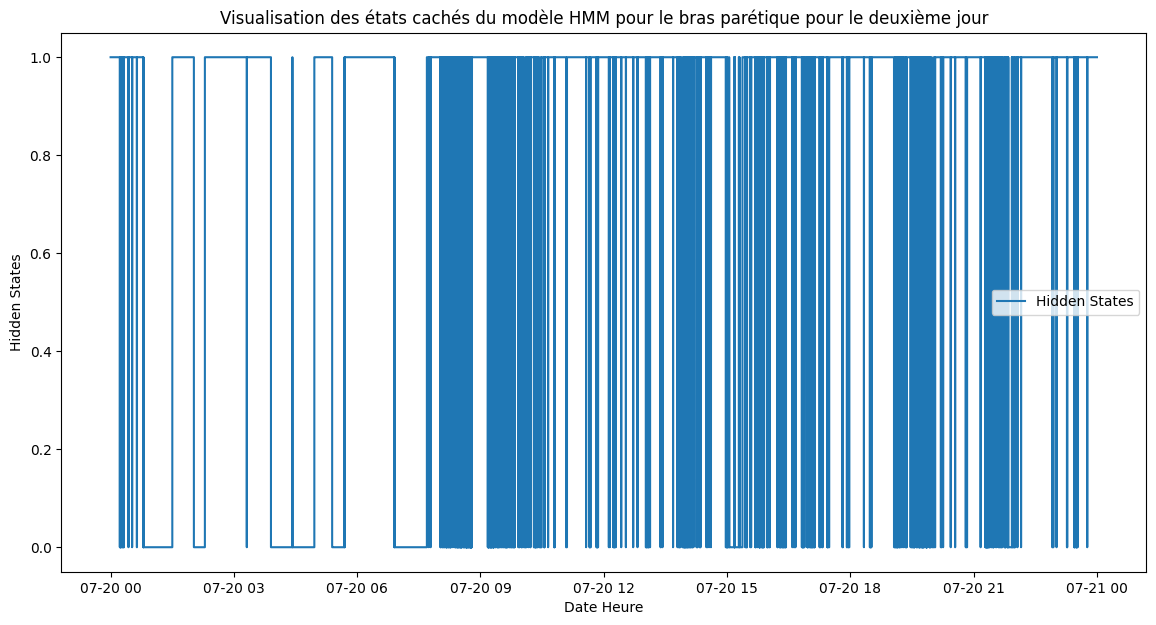

In [14]:
from hmmlearn import hmm

# Filtrer les données pour le deuxième jour
second_day_df1 = df1[df1['date_heure'].dt.date == df1['date_heure'].dt.date.unique()[1]]

# Extraire les caractéristiques pour le HMM (par exemple, X, Y, Z)
features_df1 = second_day_df1[['X', 'Y', 'Z']].values

# Définir le modèle HMM à 2 états
model_df1 = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)

# Ajuster le modèle aux données
model_df1.fit(features_df1)

# Prédire les états cachés
hidden_states_df1 = model_df1.predict(features_df1)

# Ajouter les états cachés au DataFrame
second_day_df1['hidden_states'] = hidden_states_df1

# Visualisation des états cachés du modèle HMM sous forme de plot à bâtonnets
plt.figure(figsize=(14, 7))
plt.plot(second_day_df1['date_heure'], second_day_df1['hidden_states'], drawstyle='steps-post', label='Hidden States')
plt.xlabel('Date Heure')
plt.ylabel('Hidden States')
plt.title('Visualisation des états cachés du modèle HMM pour le bras parétique pour le deuxième jour')
plt.legend()
plt.show()

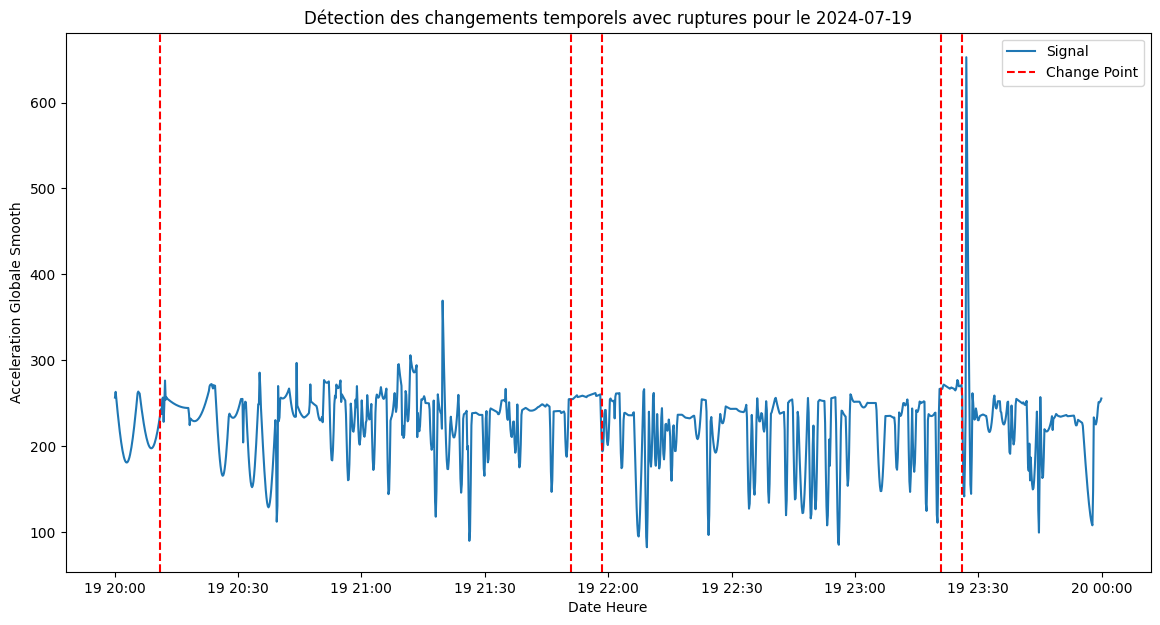

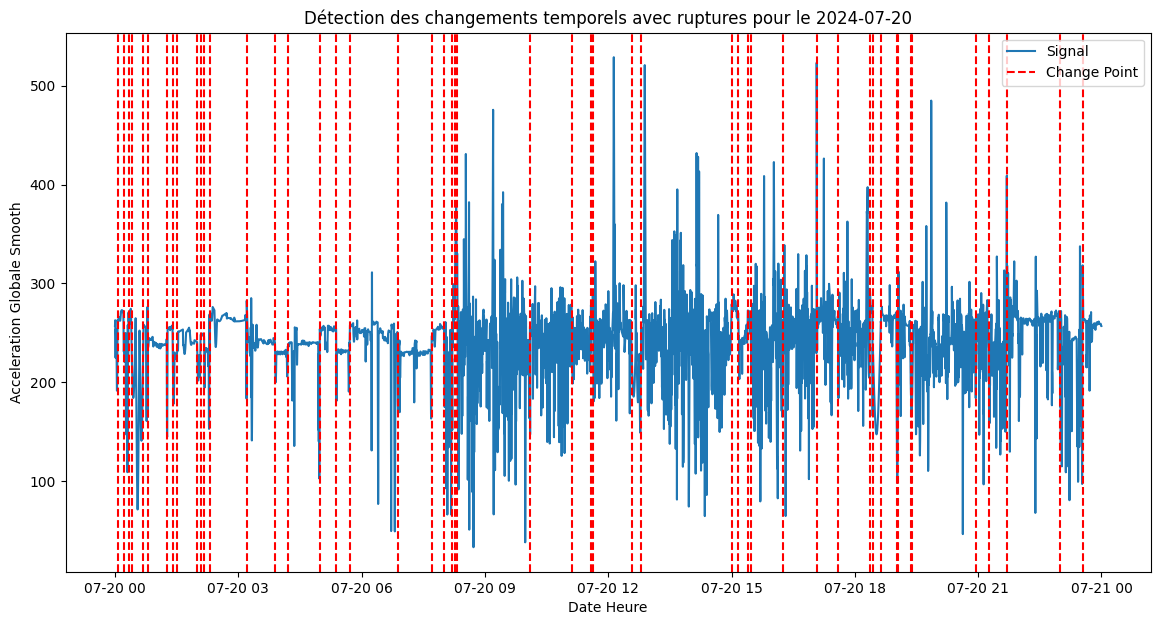

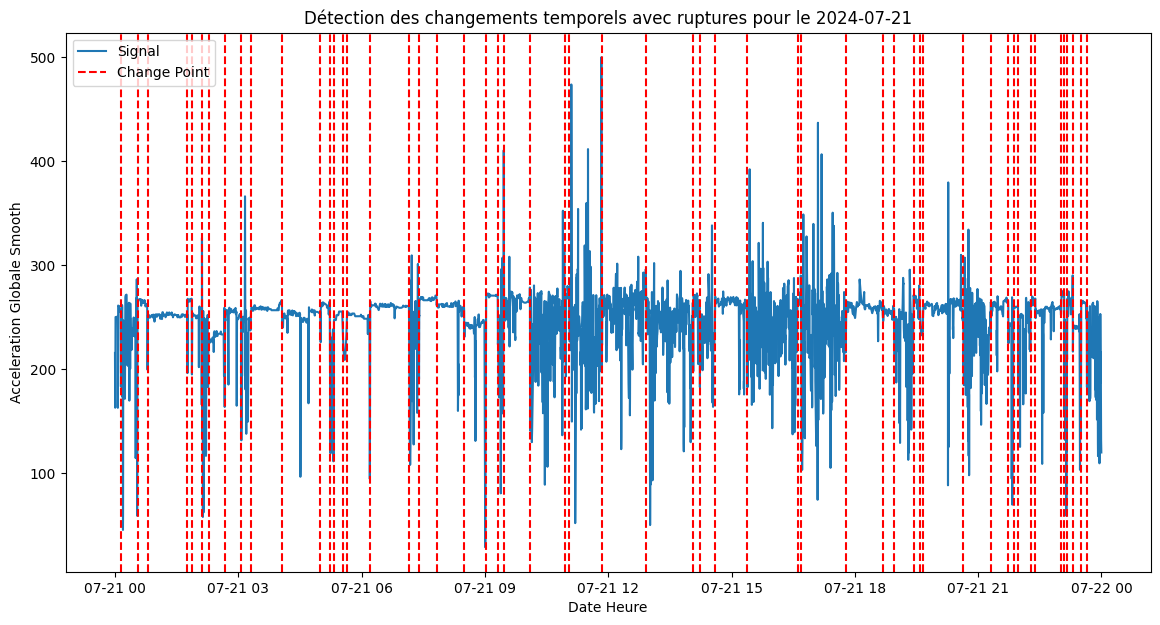

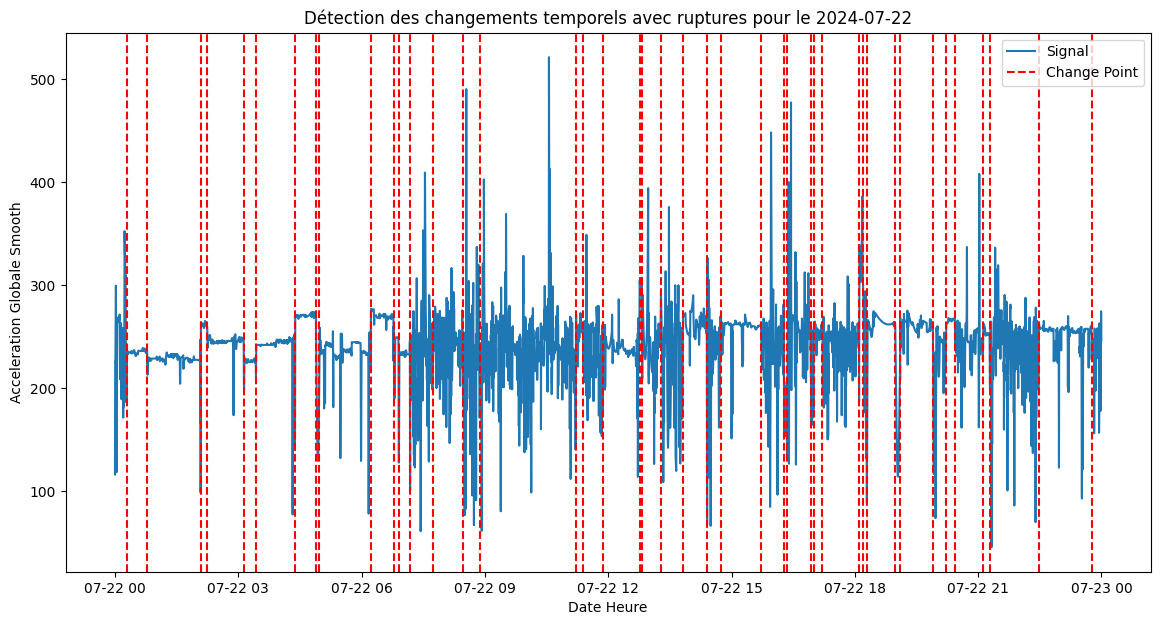

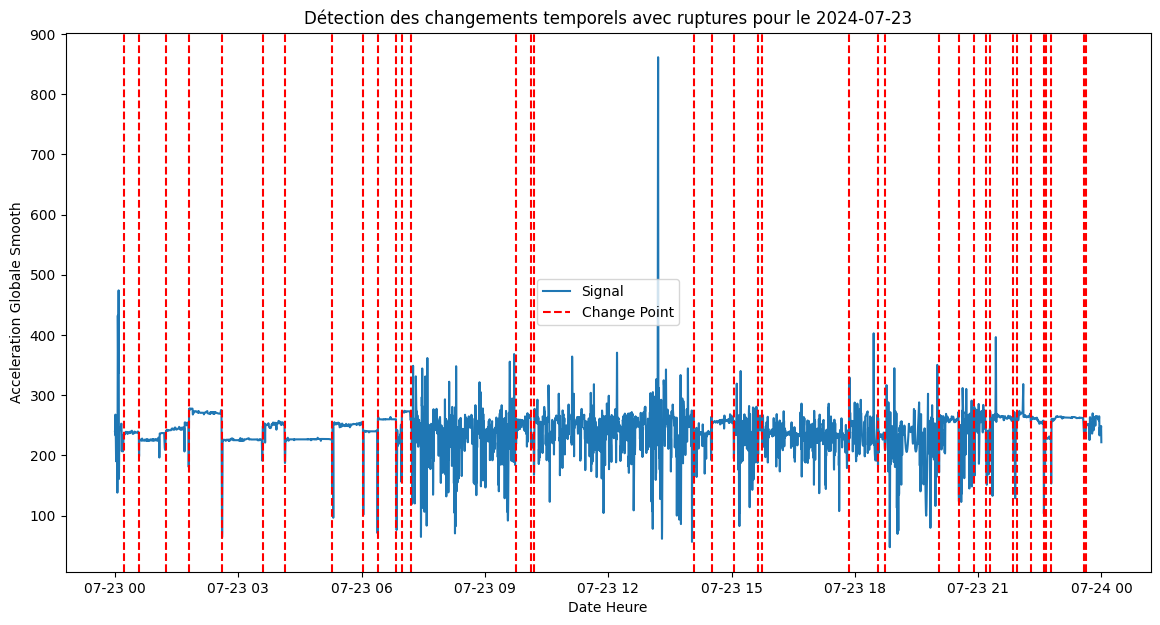

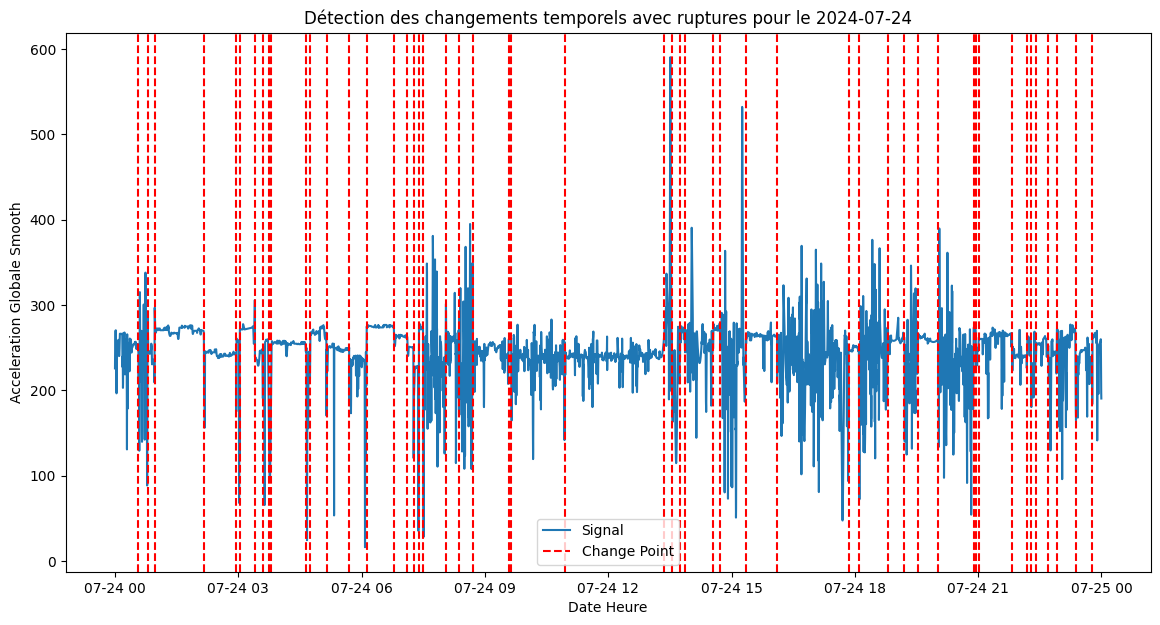

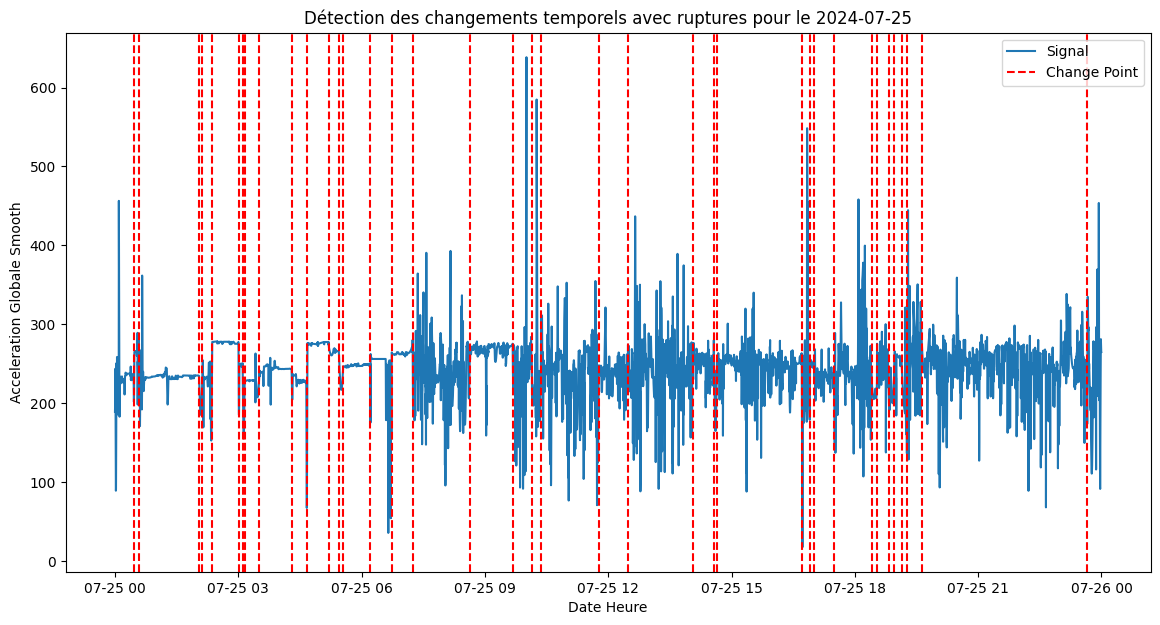

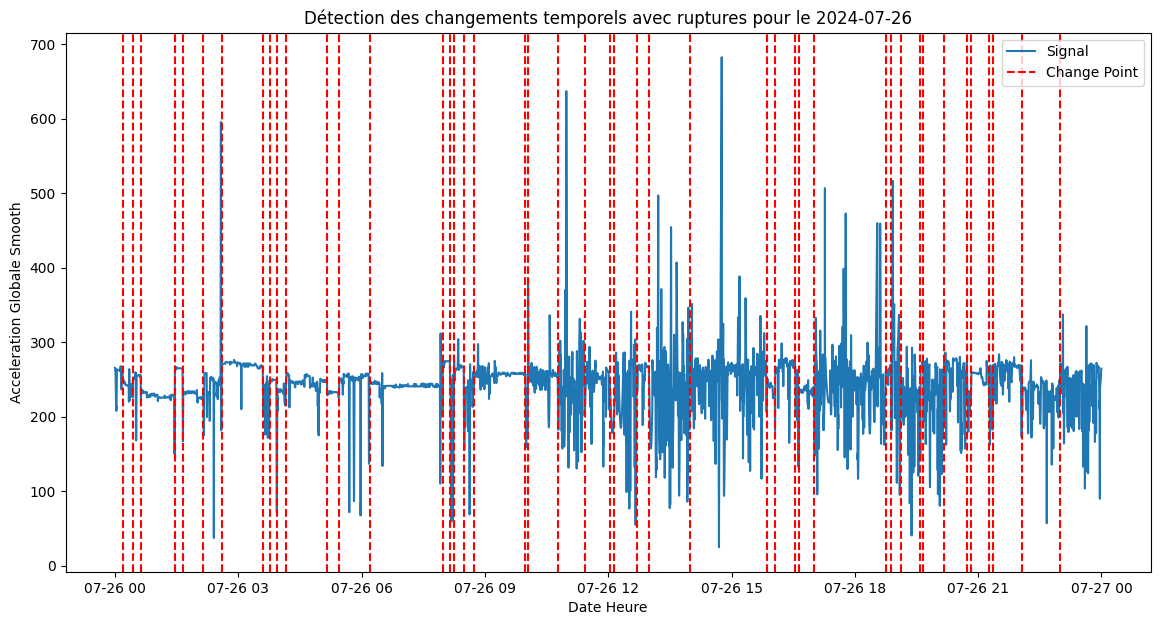

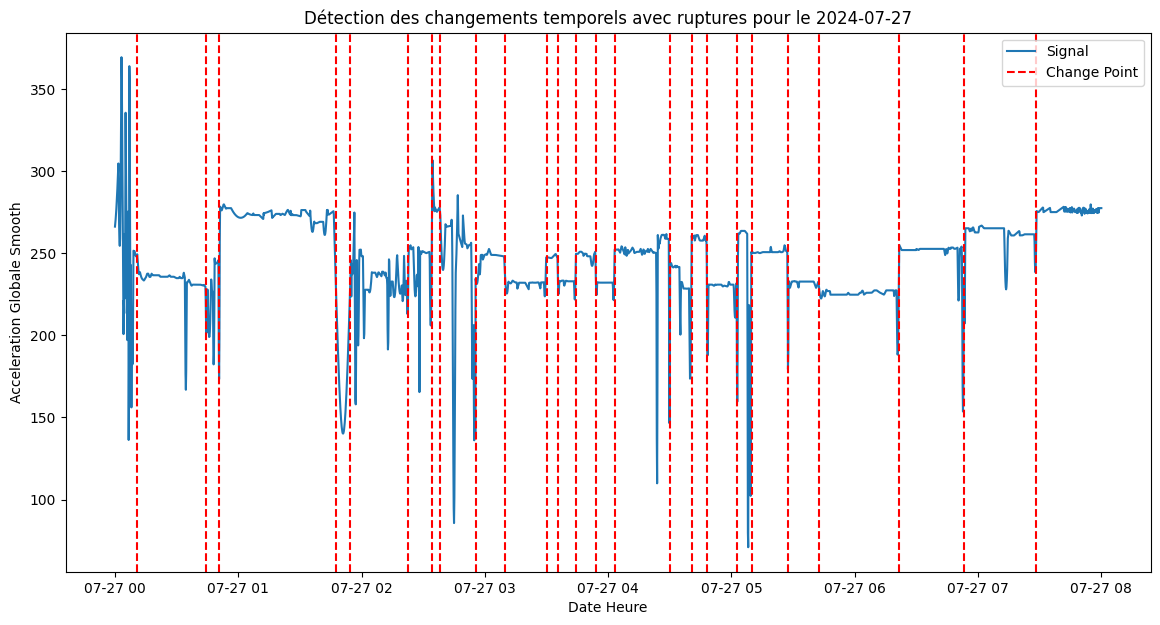

In [20]:
import ruptures as rpt 
# Calculer l'accélération globale pour df_interpolated_10Hz
df_interpolated_10Hz['acceleration_globale'] = (df_interpolated_10Hz[['X', 'Y', 'Z']]**2).sum(axis=1)**0.5

# Appliquer le filtre Savitzky-Golay sur l'accélération globale pour df_interpolated_10Hz
df_interpolated_10Hz['acceleration_globale_smooth'] = savgol_filter(df_interpolated_10Hz['acceleration_globale'], window_length=51, polyorder=3)
# Diviser les données par jour
df_interpolated_10Hz['date'] = df_interpolated_10Hz['date_heure'].dt.date
days = df_interpolated_10Hz['date'].unique()

for day in days:
    df_day = df_interpolated_10Hz[df_interpolated_10Hz['date'] == day]
    signal = df_day['acceleration_globale_smooth'].values

    # Downsample the signal to reduce memory usage
    downsample_factor = 100  # Adjust this factor based on your memory constraints
    signal_downsampled = signal[::downsample_factor]
    time_downsampled = df_day['date_heure'].iloc[::downsample_factor]

    # Définir l'algorithme de détection de changement (ici, on utilise Pelt avec une pénalité)
    algo = rpt.Pelt(model="rbf").fit(signal_downsampled)
    result = algo.predict(pen=10)

    # Visualiser les points de changement détectés
    plt.figure(figsize=(14, 7))
    plt.plot(time_downsampled, signal_downsampled, label='Signal')
    for cp in result:
        if cp < len(time_downsampled):
            plt.axvline(time_downsampled.iloc[cp], color='r', linestyle='--', label='Change Point' if cp == result[0] else "")
    plt.xlabel('Date Heure')
    plt.ylabel('Acceleration Globale Smooth')
    plt.title(f'Détection des changements temporels avec ruptures pour le {day}')
    plt.legend()
    plt.show()


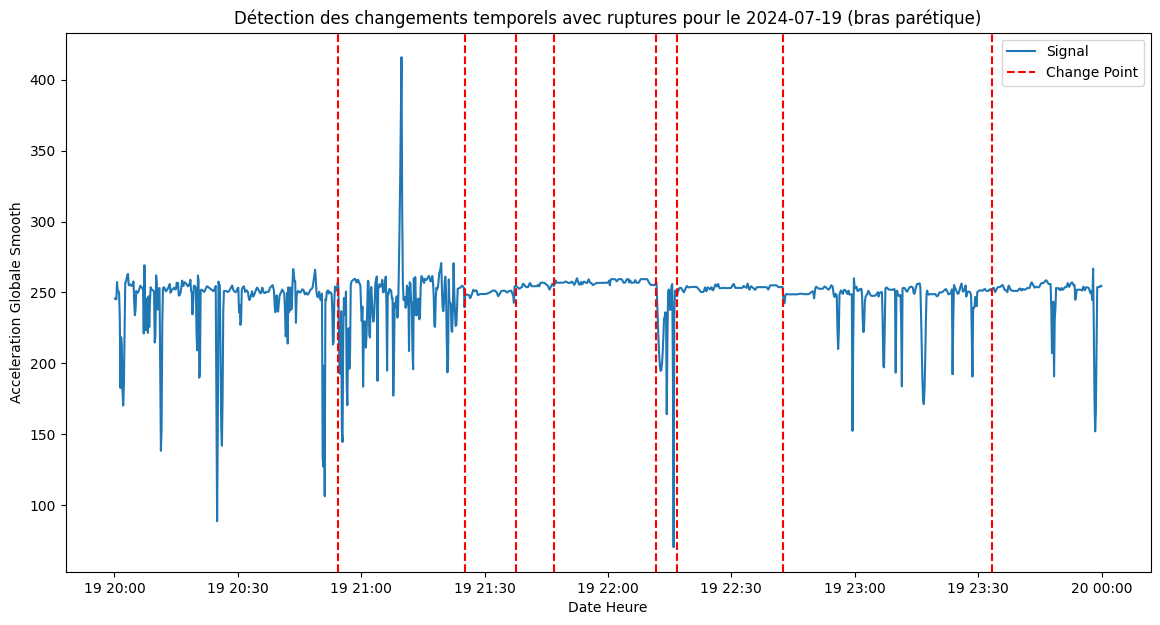

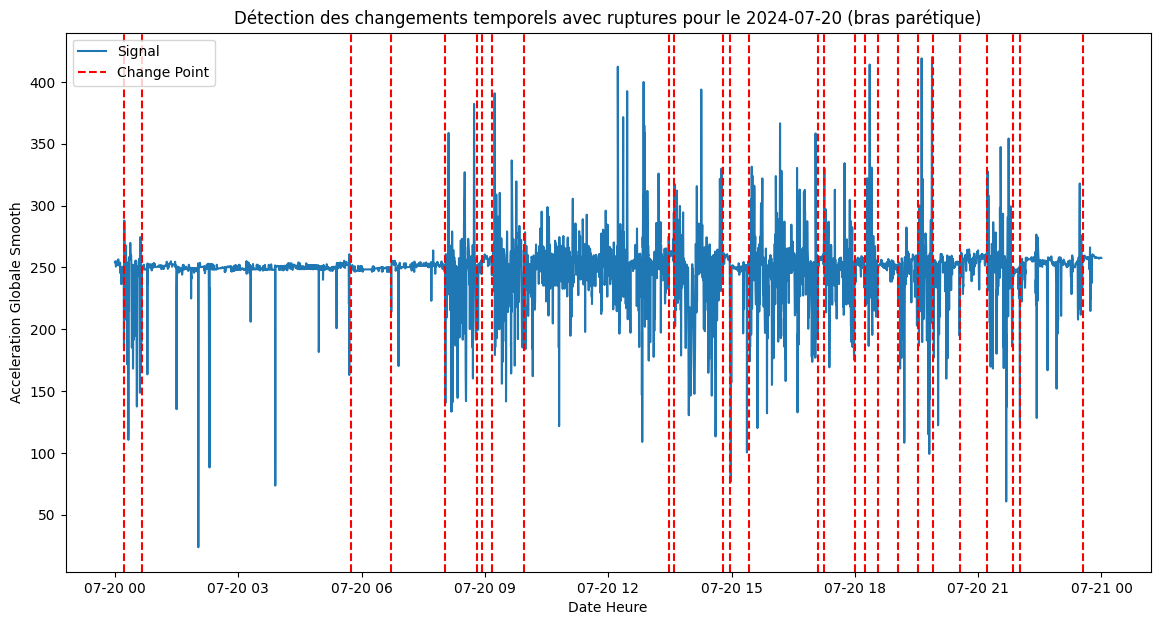

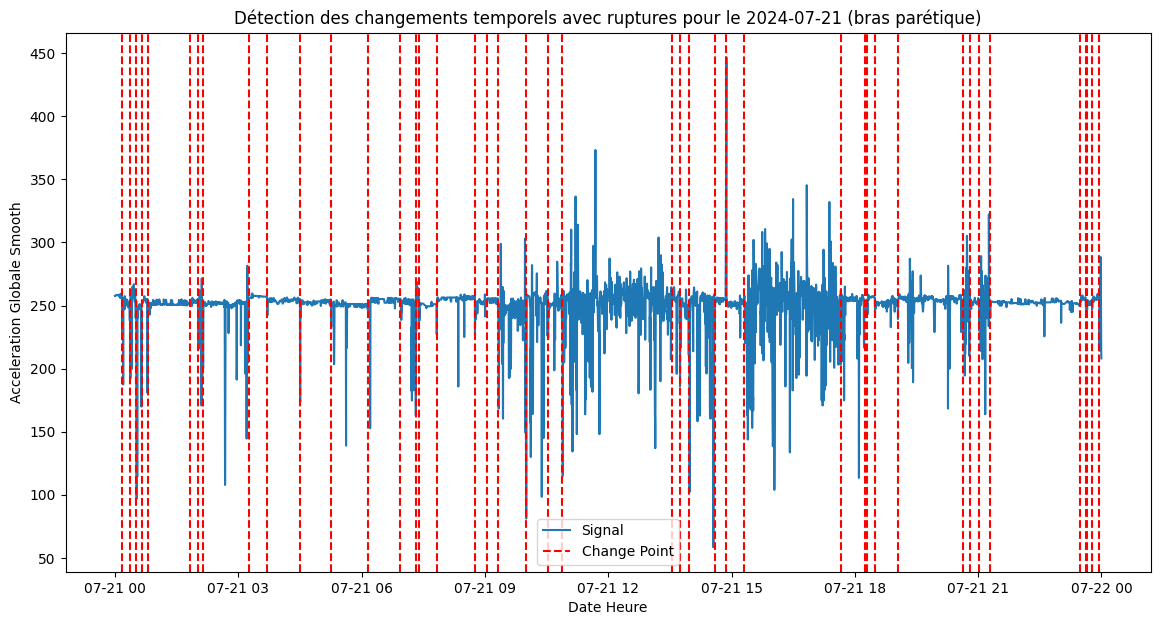

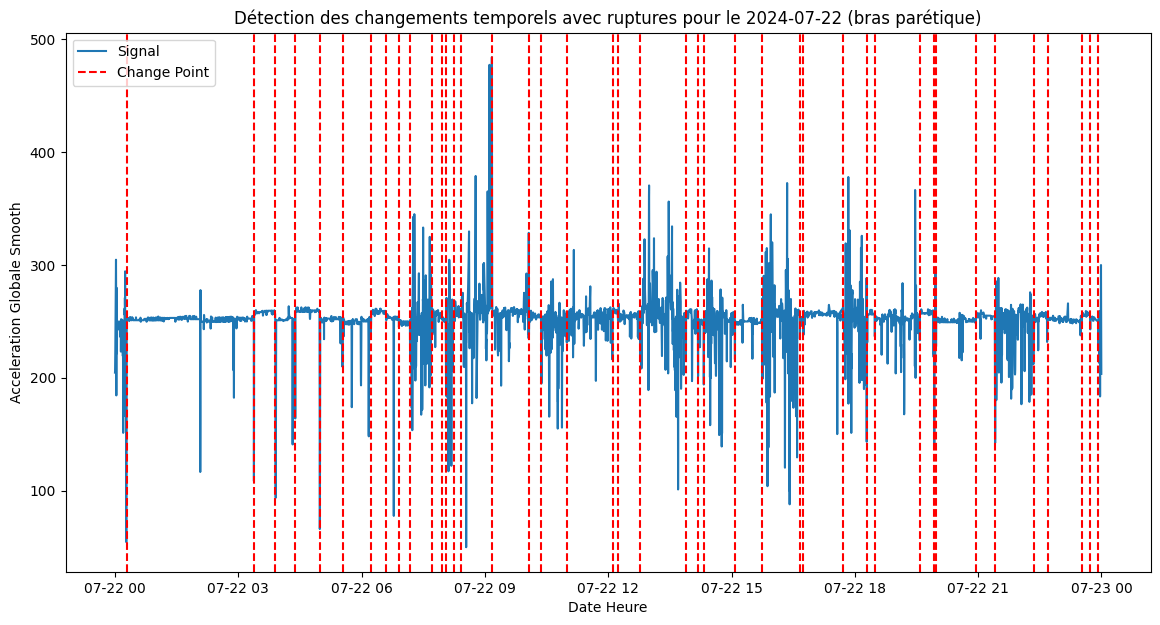

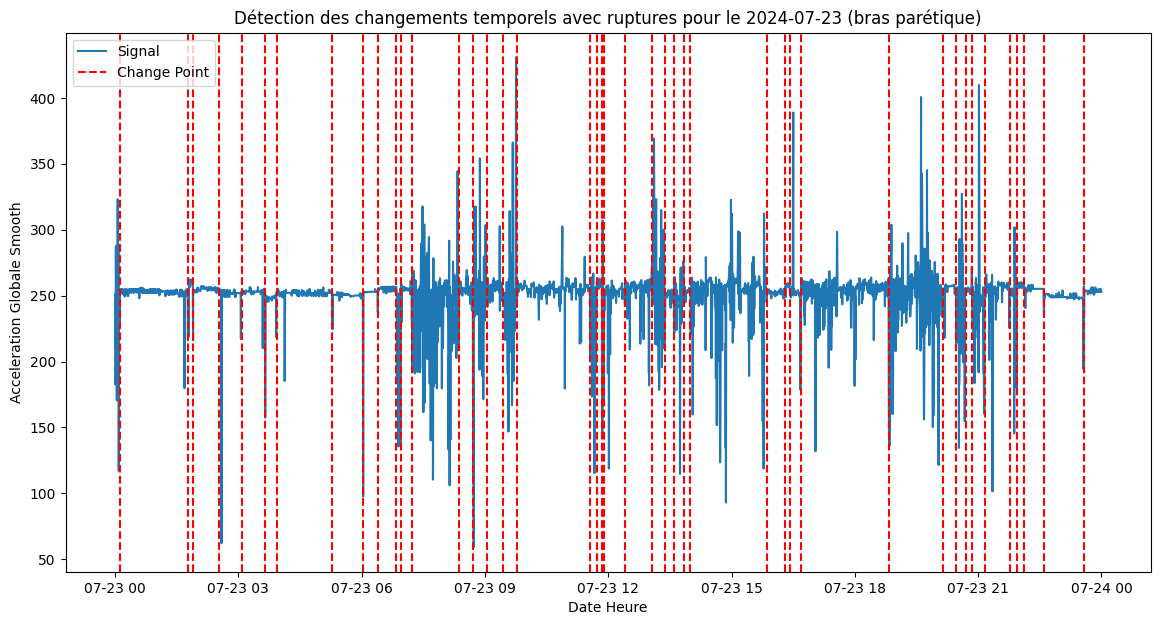

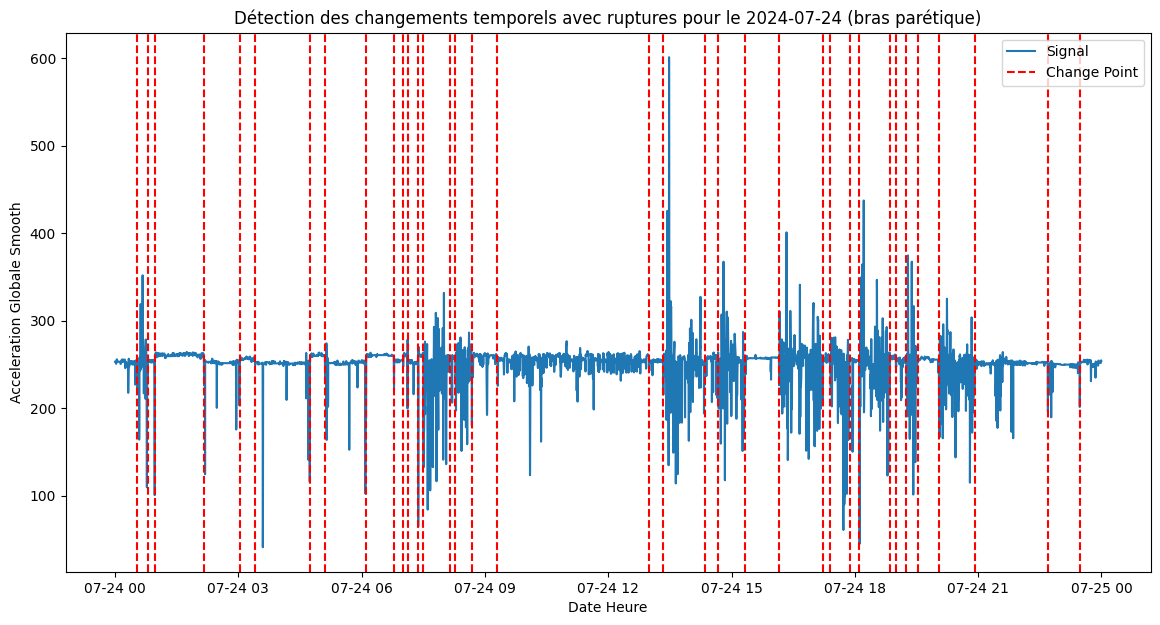

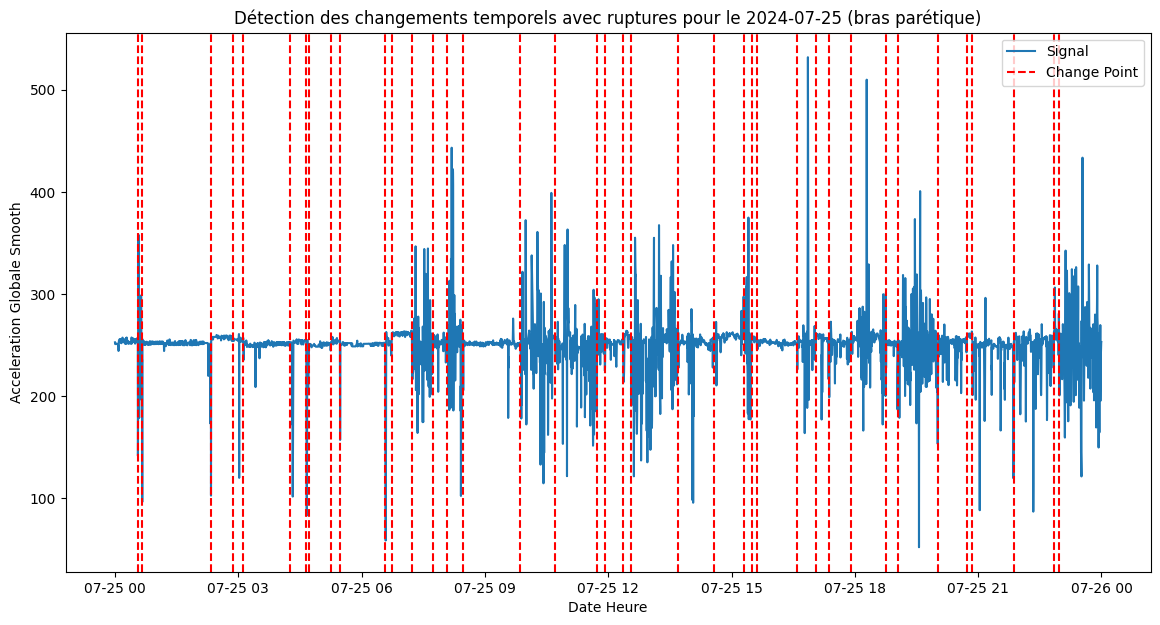

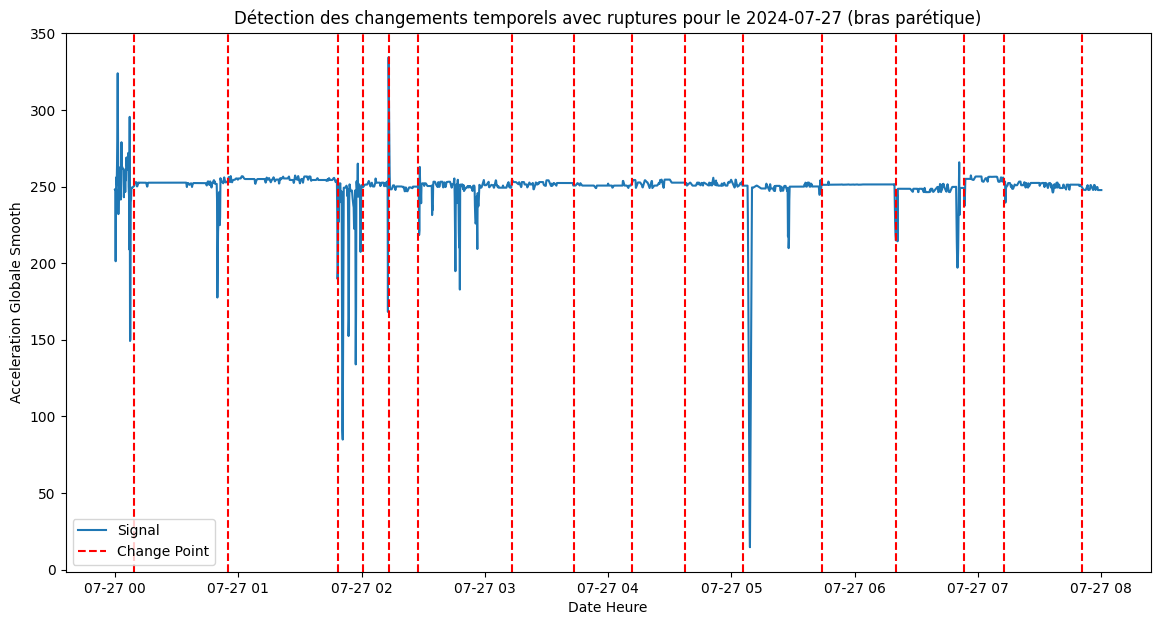

In [31]:
    # Calculer l'accélération globale pour df1_interpolated_10Hz
    df1_interpolated_10Hz['acceleration_globale'] = (df1_interpolated_10Hz[['X', 'Y', 'Z']]**2).sum(axis=1)**0.5

    # Appliquer le filtre Savitzky-Golay sur l'accélération globale pour df1_interpolated_10Hz
    df1_interpolated_10Hz['acceleration_globale_smooth'] = savgol_filter(df1_interpolated_10Hz['acceleration_globale'], window_length=51, polyorder=3)

    # Diviser les données par jour
    df1_interpolated_10Hz['date'] = df1_interpolated_10Hz['date_heure'].dt.date
    days_df1 = df1_interpolated_10Hz['date'].unique()

    for day in days_df1:
        df1_day = df1_interpolated_10Hz[df1_interpolated_10Hz['date'] == day]
        signal_df1 = df1_day['acceleration_globale_smooth'].values

        # Downsample the signal to reduce memory usage
        signal_downsampled_df1 = signal_df1[::downsample_factor]
        time_downsampled_df1 = df1_day['date_heure'].iloc[::downsample_factor]

        # Définir l'algorithme de détection de changement (ici, on utilise Pelt avec une pénalité)
        algo_df1 = rpt.Pelt(model="rbf").fit(signal_downsampled_df1)
        result_df1 = algo_df1.predict(pen=10)

        # Visualiser les points de changement détectés
        plt.figure(figsize=(14, 7))
        plt.plot(time_downsampled_df1, signal_downsampled_df1, label='Signal')
        for cp in result_df1:
            if cp < len(time_downsampled_df1):
                plt.axvline(time_downsampled_df1.iloc[cp], color='r', linestyle='--', label='Change Point' if cp == result_df1[0] else "")
        plt.xlabel('Date Heure')
        plt.ylabel('Acceleration Globale Smooth')
        plt.title(f'Détection des changements temporels avec ruptures pour le {day} (bras parétique)')
        plt.legend()
        plt.show()

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/2518454687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data['hidden_states'] = hidden_states


/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/2518454687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data['hidden_states'] = hidden_states
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


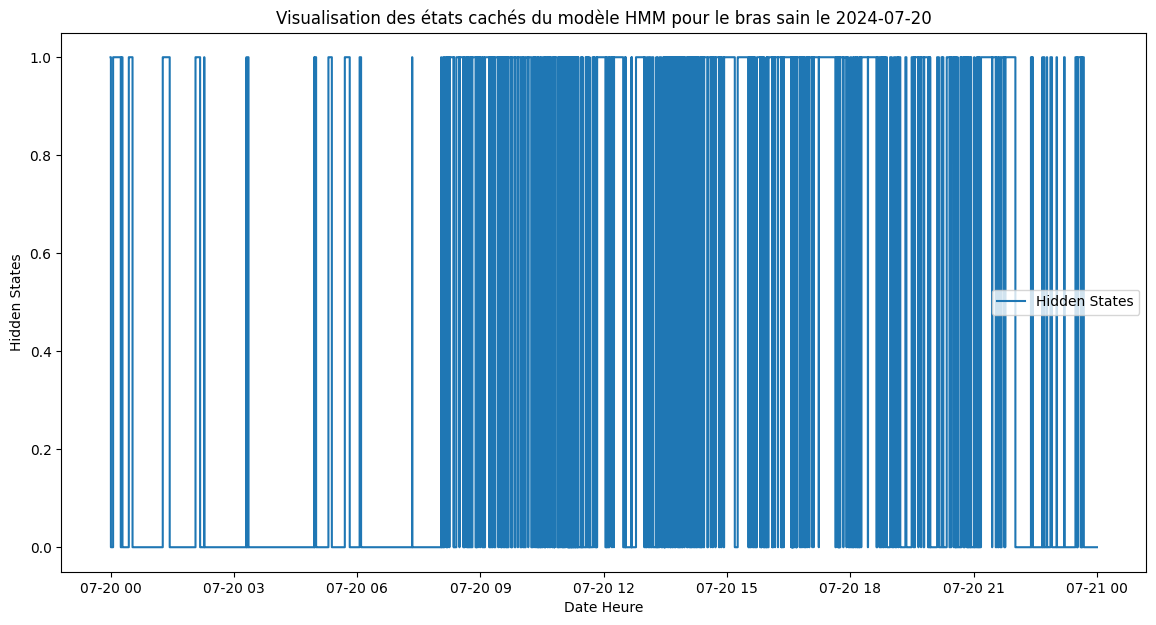

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/2518454687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data['hidden_states'] = hidden_states
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/2518454687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data['hidden_states'] = hidden_states
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/2518454687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data['hidden_states'] = hidden_states
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


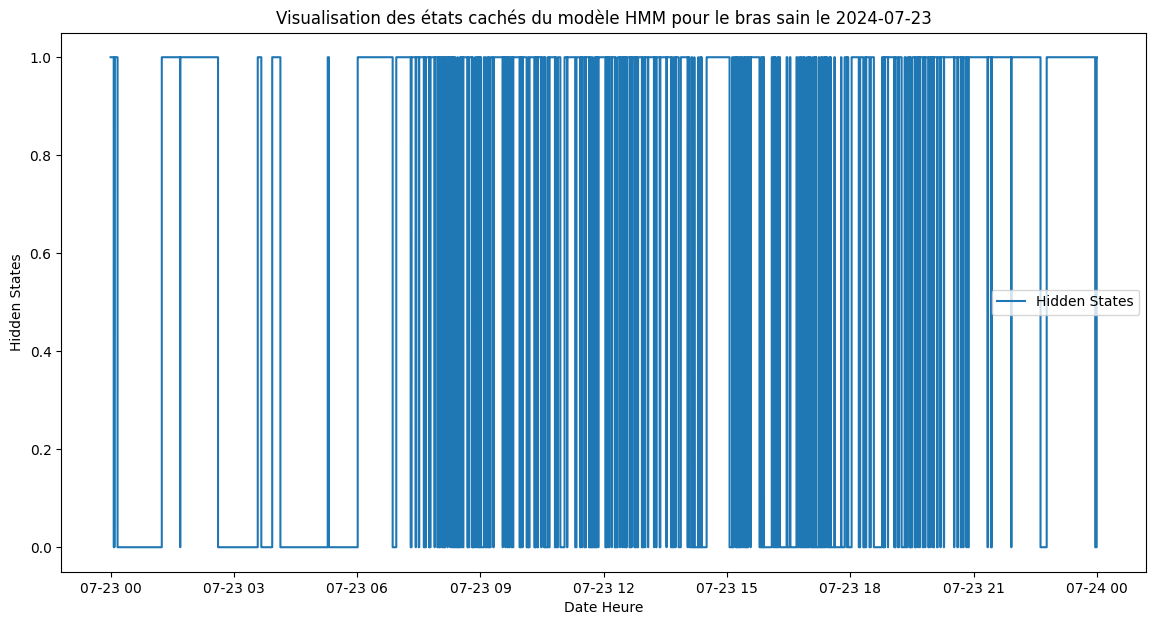

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/2518454687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data['hidden_states'] = hidden_states
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


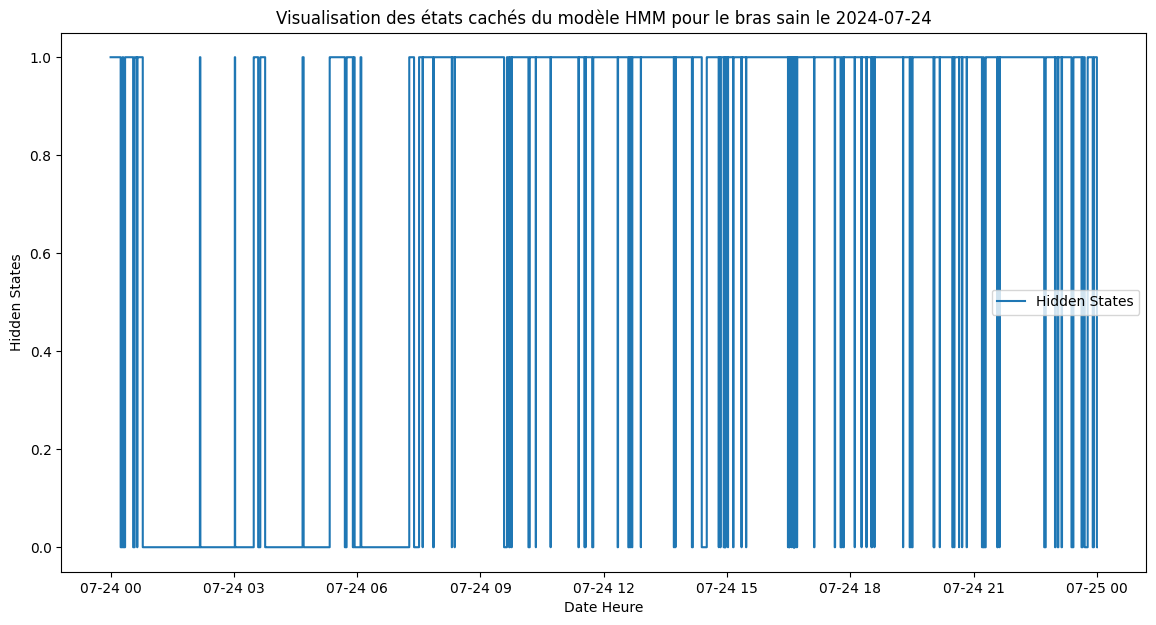

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/2518454687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data['hidden_states'] = hidden_states
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


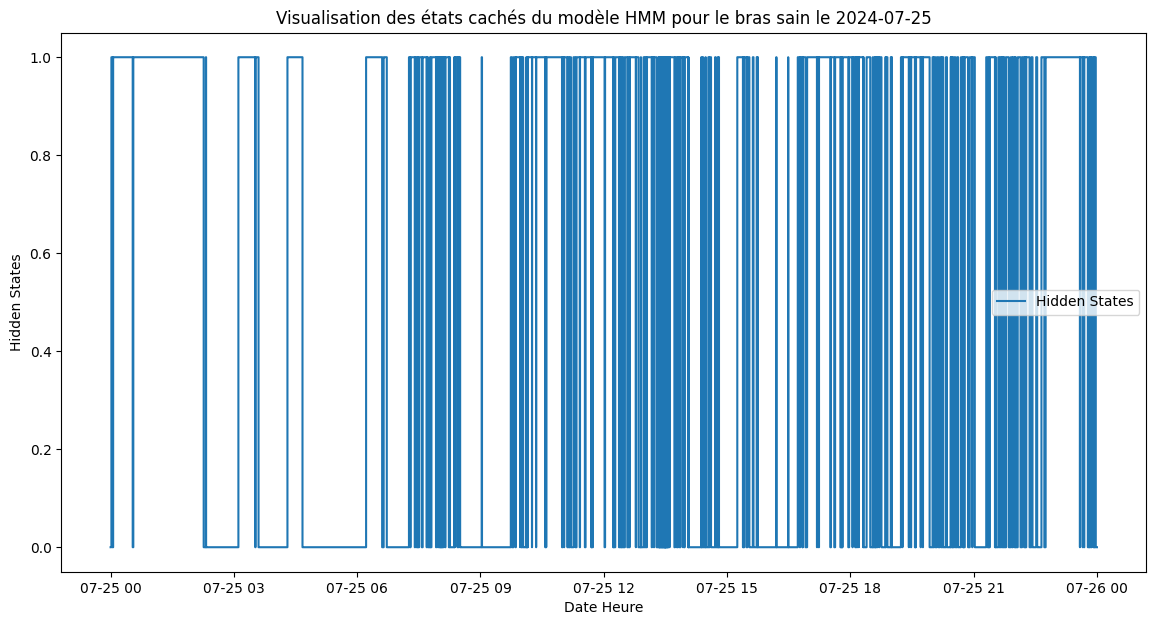

Model is not converging.  Current: -77694134.33158569 is not greater than -77694134.33092757. Delta is -0.0006581246852874756
/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/2518454687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data['hidden_states'] = hidden_states
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


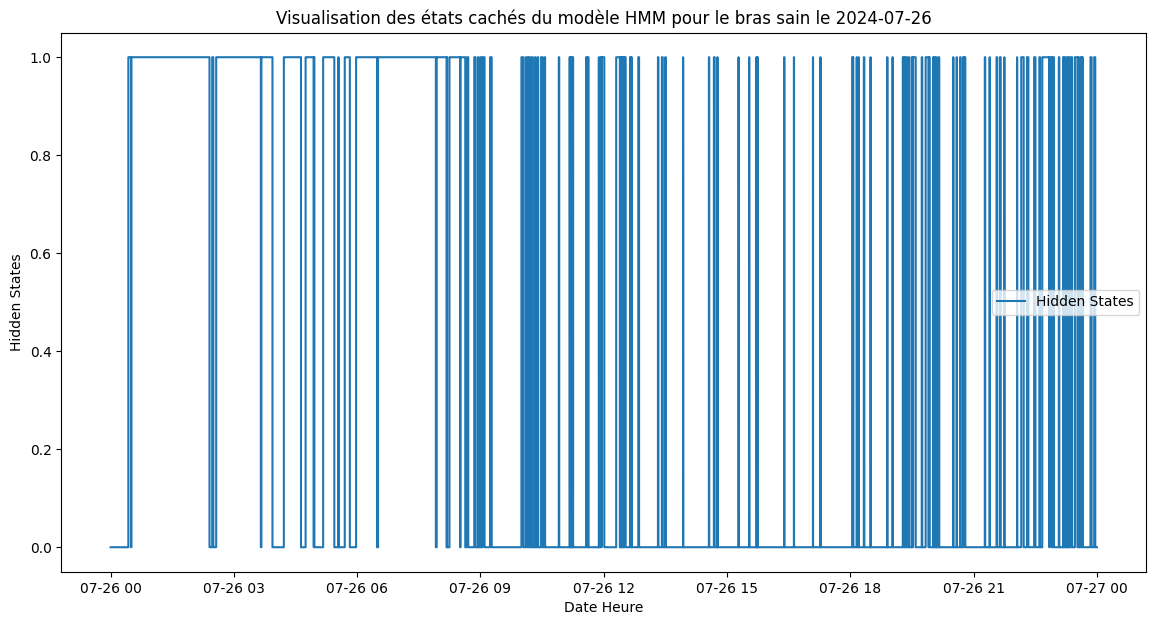

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/2518454687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data['hidden_states'] = hidden_states


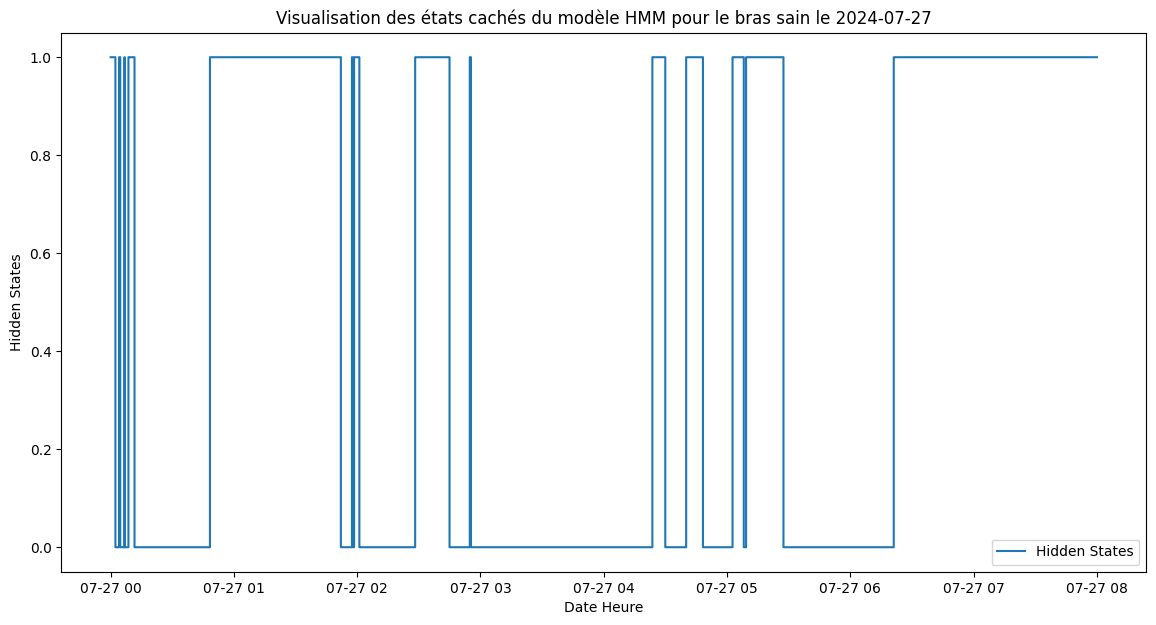

In [29]:
from hmmlearn import hmm 
for day in df_interpolated['date'].unique():
    # Filtrer les données pour chaque jour
    day_data = df_interpolated[df_interpolated['date'] == day]

    # Extraire les caractéristiques pour le HMM (par exemple, X, Y, Z)
    features = day_data[['X', 'Y', 'Z']].values

    # Définir le modèle HMM à 2 états
    model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)

    # Ajuster le modèle aux données
    model.fit(features)

    # Prédire les états cachés
    hidden_states = model.predict(features)

    # Ajouter les états cachés au DataFrame
    day_data['hidden_states'] = hidden_states

    # Visualisation des états cachés du modèle HMM sous forme de plot à bâtonnets
    plt.figure(figsize=(14, 7))
    plt.plot(day_data['date_heure'], day_data['hidden_states'], drawstyle='steps-post', label='Hidden States')
    plt.xlabel('Date Heure')
    plt.ylabel('Hidden States')
    plt.title(f'Visualisation des états cachés du modèle HMM pour le bras sain le {day}')
    plt.legend()
    plt.show()


/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/3961776896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data_df1['hidden_states'] = hidden_states_df1


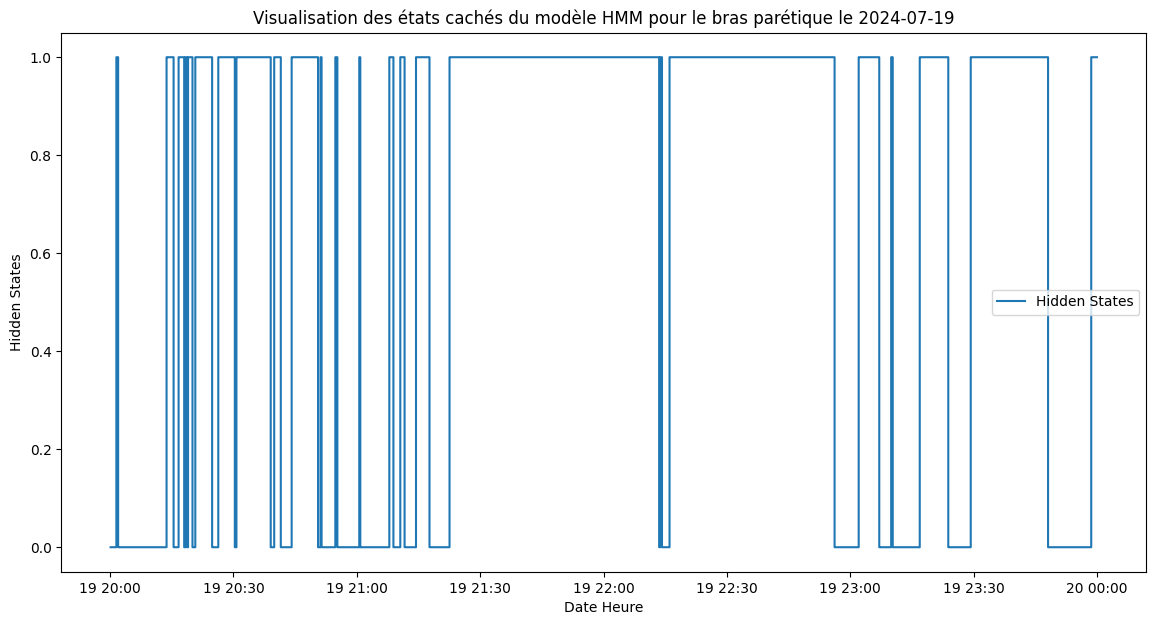

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/3961776896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data_df1['hidden_states'] = hidden_states_df1
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Model is not converging.  Current: -77460698.30376199 is not greater than -77460698.30368984. Delta is -7.215142250061035e-05
/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/3961776896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data_df1['hidden_states'] = hidden_states_df1


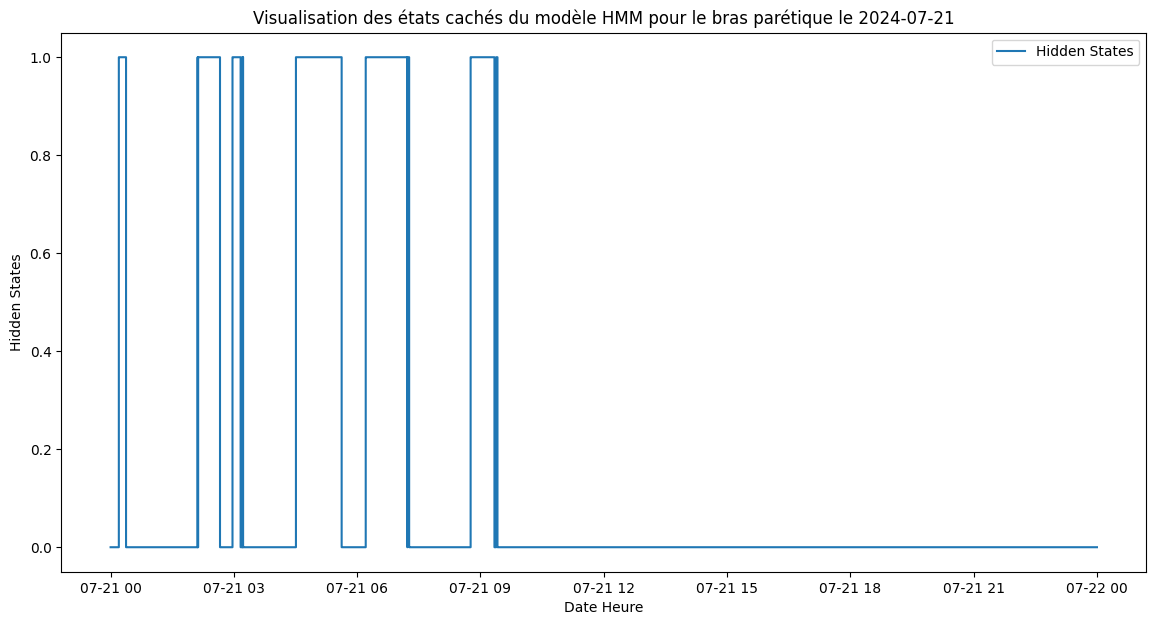

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/3961776896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data_df1['hidden_states'] = hidden_states_df1
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


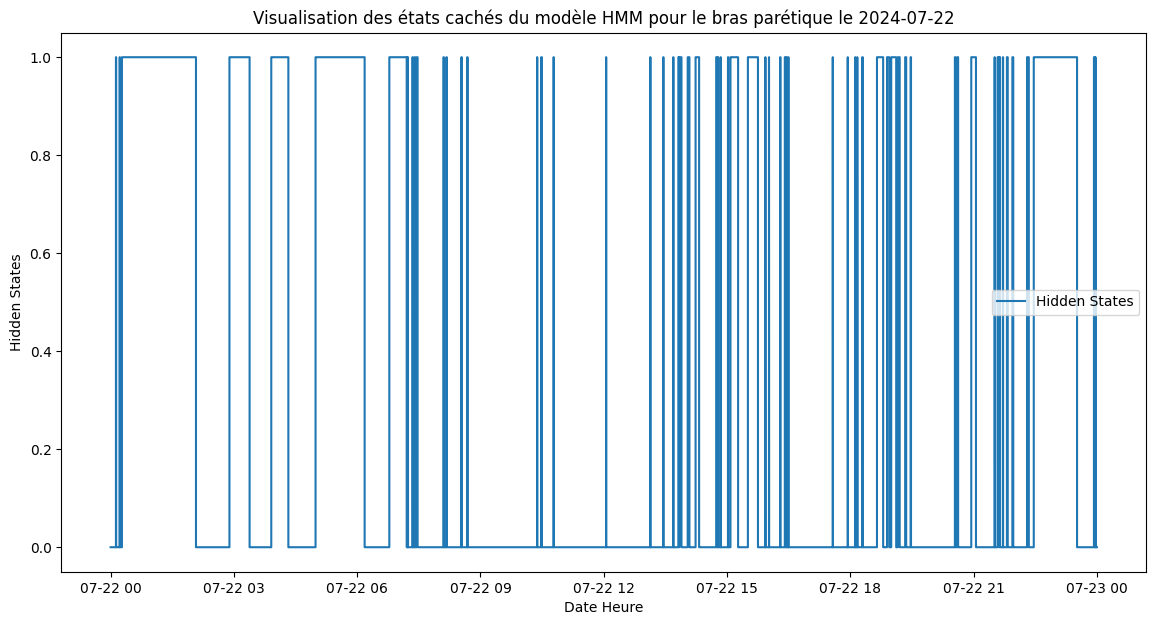

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/3961776896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data_df1['hidden_states'] = hidden_states_df1
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


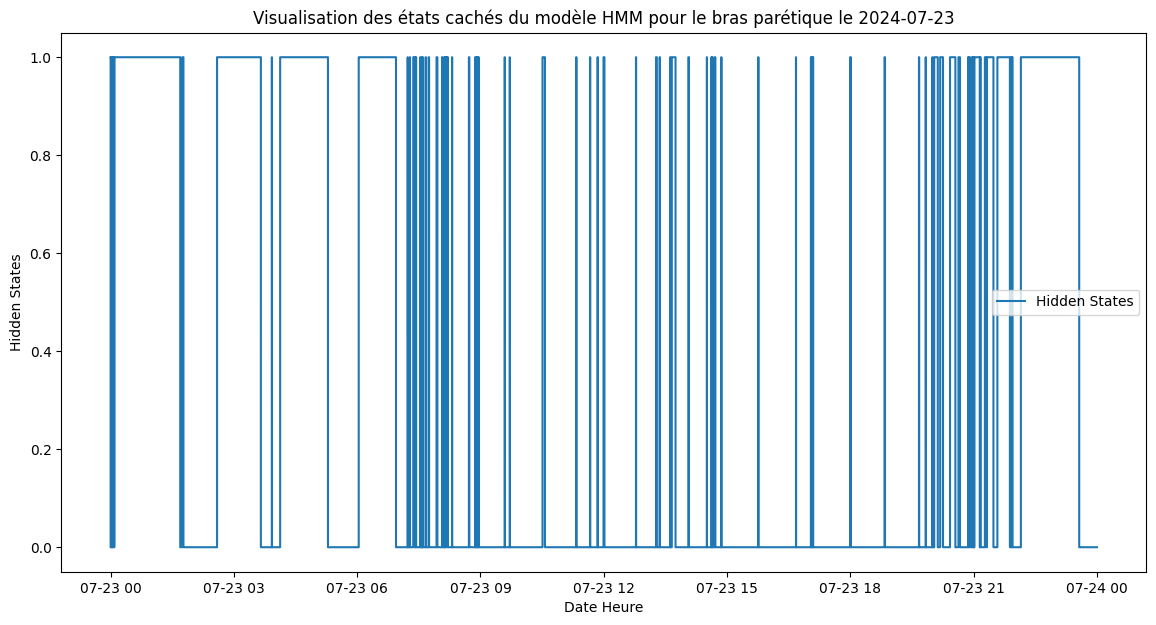

Model is not converging.  Current: -75520046.07842171 is not greater than -75520046.07827847. Delta is -0.00014324486255645752
/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/3961776896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data_df1['hidden_states'] = hidden_states_df1
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


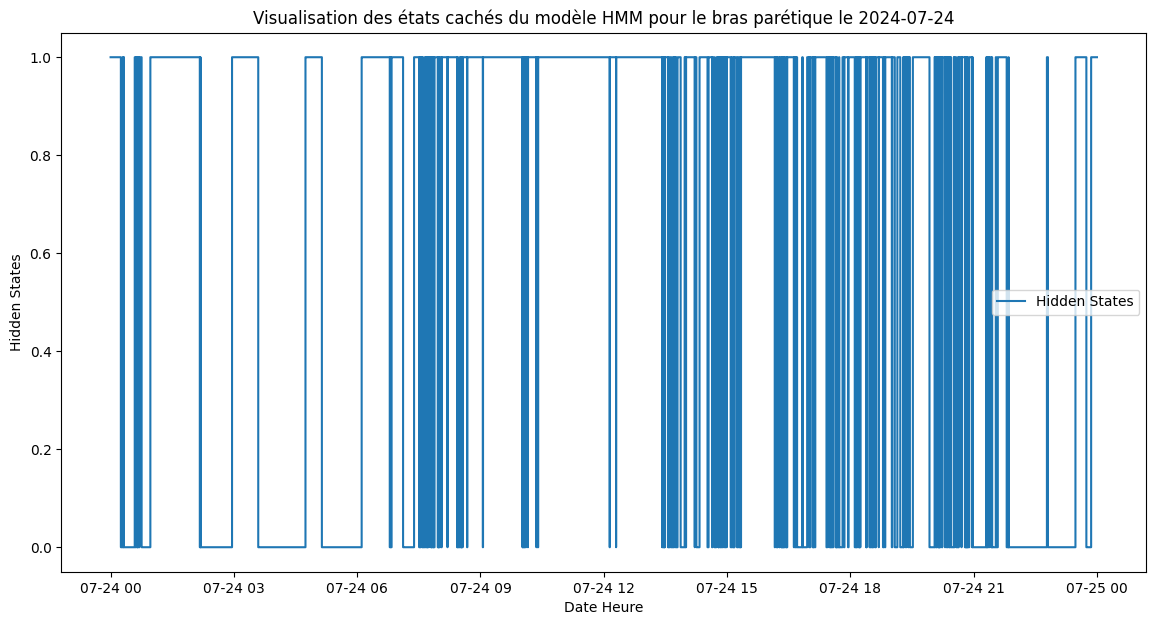

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/3961776896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data_df1['hidden_states'] = hidden_states_df1
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


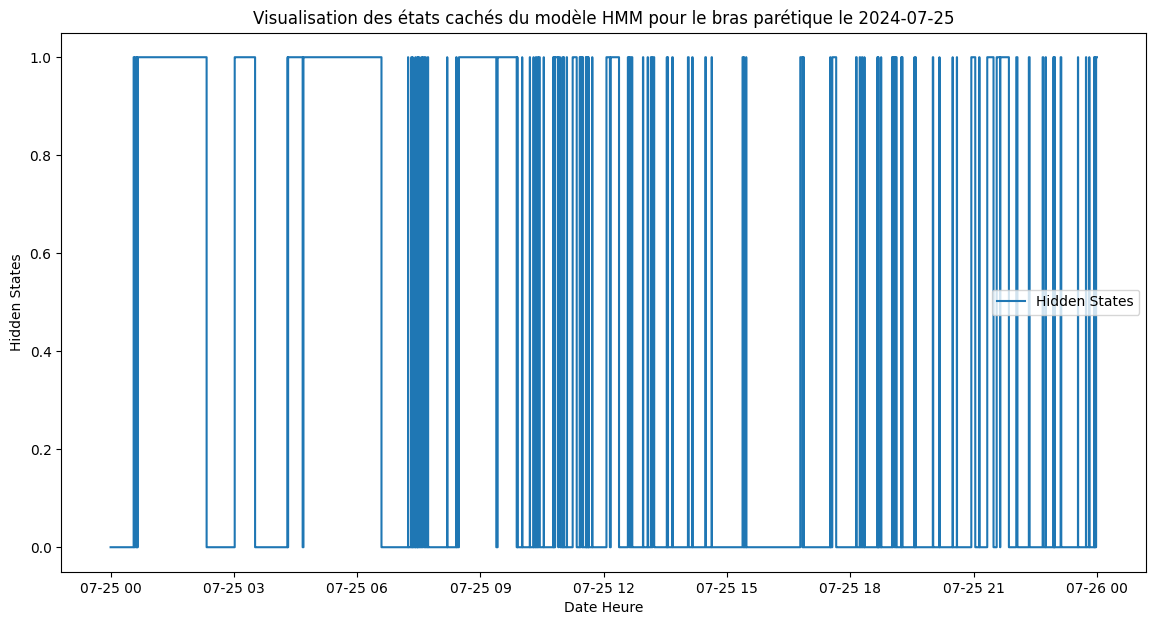

Model is not converging.  Current: -76736092.91505572 is not greater than -76736092.90978315. Delta is -0.005272567272186279
/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/3961776896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data_df1['hidden_states'] = hidden_states_df1
/Users/leoolivier/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


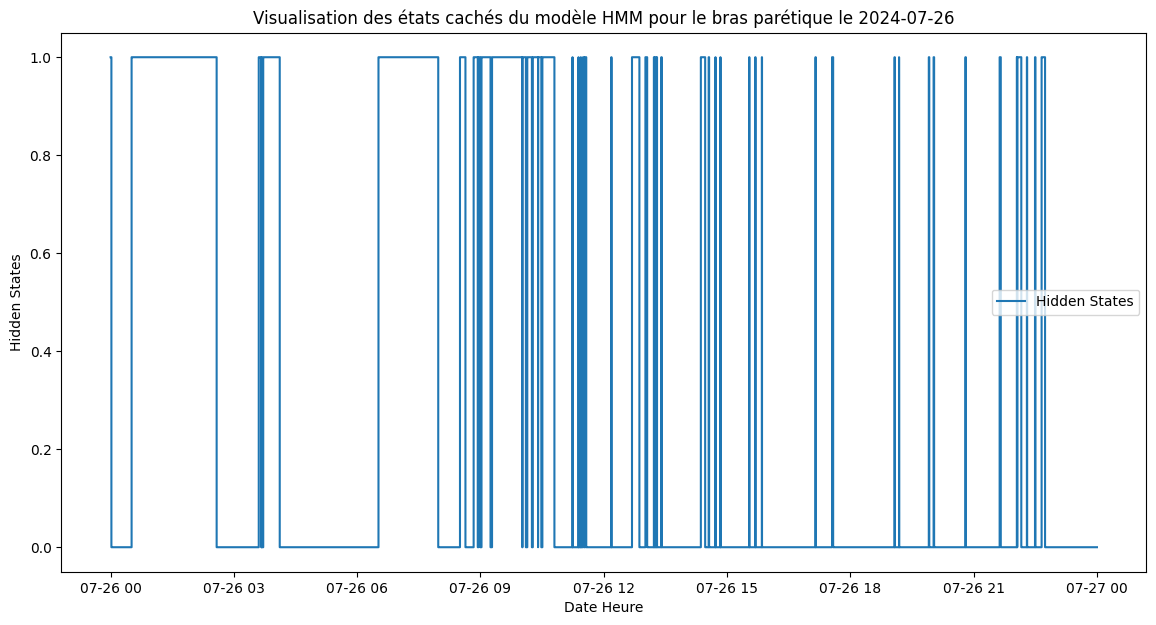

/var/folders/x1/bx6lyj5s5833lk_2spqyq8180000gn/T/ipykernel_12479/3961776896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data_df1['hidden_states'] = hidden_states_df1


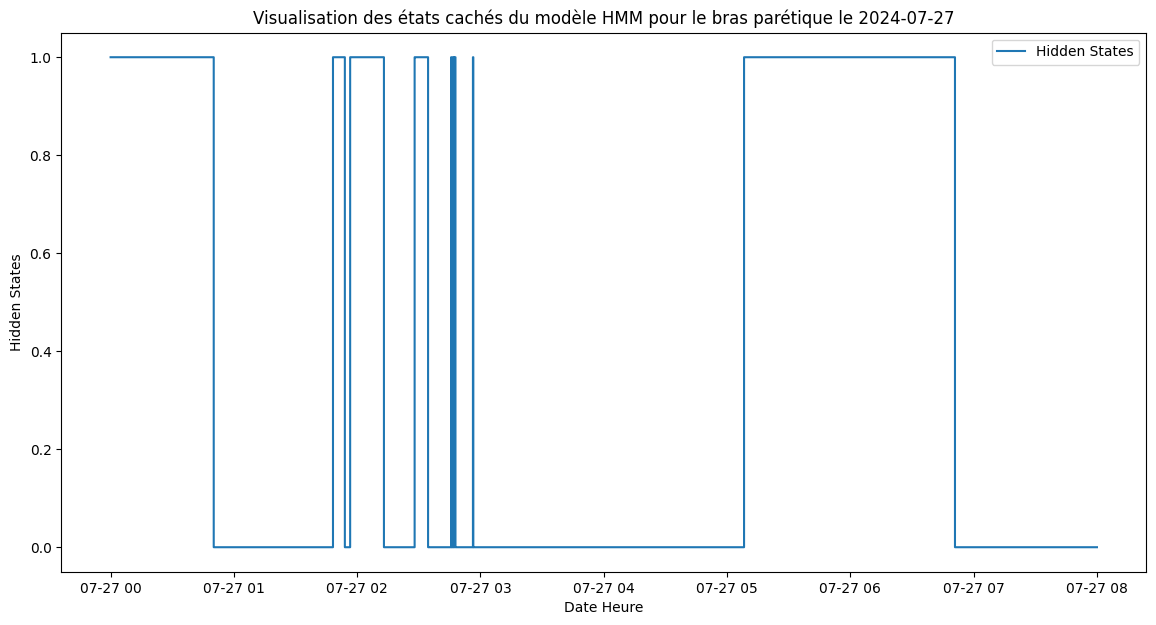

In [44]:
for day in df1_interpolated['date'].unique():
    # Filtrer les données pour chaque jour
    day_data_df1 = df1_interpolated[df1_interpolated['date'] == day]

    # Extraire les caractéristiques pour le HMM (par exemple, X, Y, Z)
    features_df1 = day_data_df1[['X', 'Y', 'Z']].values

    # Définir le modèle HMM à 2 états
    model_df1 = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)

    # Ajuster le modèle aux données
    model_df1.fit(features_df1)

    # Prédire les états cachés
    hidden_states_df1 = model_df1.predict(features_df1)

    # Ajouter les états cachés au DataFrame
    day_data_df1['hidden_states'] = hidden_states_df1

    # Visualisation des états cachés du modèle HMM sous forme de plot à bâtonnets
    plt.figure(figsize=(14, 7))
    plt.plot(day_data_df1['date_heure'], day_data_df1['hidden_states'], drawstyle='steps-post', label='Hidden States')
    plt.xlabel('Date Heure')
    plt.ylabel('Hidden States')
    plt.title(f'Visualisation des états cachés du modèle HMM pour le bras parétique le {day}')
    plt.legend()
    plt.show()